In [89]:
# Import pandas for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations, especially array handling
import numpy as np
# Import os for interacting with the operating system, like file paths
import os
# Import matplotlib.pyplot for basic plotting and visualization
import matplotlib.pyplot as plt
# Import seaborn for enhanced statistical data visualization
import seaborn as sns
# Import train_test_split from sklearn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Import accuracy_score from sklearn.metrics for calculating model accuracy
from sklearn.metrics import accuracy_score
# Import confusion_matrix from sklearn.metrics for creating a confusion matrix
from sklearn.metrics import confusion_matrix
# Import classification_report from sklearn.metrics for generating a classification report
from sklearn.metrics import classification_report

# Import statsmodels.api for statistical modeling
import statsmodels.api as sm
# Import scipy.stats for statistical functions and distributions
from scipy import stats
# Import statsmodels.formula.api for statistical modeling using R-style formulas
import statsmodels.formula.api as smf


In [91]:
# --- Configuration ---
# Define the path to the final output file from the combined pipeline
# This variable holds the file path where the processed and integrated data is stored.
FINAL_PROCESSED_DATA_FILE = r"C:\Users\yadla\OneDrive\Desktop\Hospital_Analysis_Project\Data\Hospital_Financial_Analysis_Subset_Integrated_Imputed.csv" # Replace with your actual path

# Set plot style
# Use seaborn's 'whitegrid' style for plots, which adds a grid for better readability.
sns.set_style("whitegrid")
# Set the default size for matplotlib figures (width, height) in inches.
plt.rcParams['figure.figsize'] = (12, 7) # Set default figure size

# Define the categorization dictionary for the columns in the final integrated data.
# This dictionary maps each column name to a primary category and an optional subcategory.
# This is useful for organizing and grouping variables for analysis and visualization.
column_category_map = {
    "Year": {'category': 'Time', 'subcategory': None}, # Time-based variable
    "facility_id": {'category': 'Identifier', 'subcategory': None}, # Unique identifier for facilities
    "Hospital Name": {'category': 'Identifier', 'subcategory': None}, # Hospital name as an identifier
    "State Code": {'category': 'Geography', 'subcategory': 'State'}, # Geographical information (State level)
    "County": {'category': 'Geography', 'subcategory': 'County'}, # Geographical information (County level)
    "Rural Versus Urban": {'category': 'Geography', 'subcategory': 'Rural/Urban'}, # Geographical information (Rural/Urban classification)
    "Total_Staffing_FTE": {'category': 'Operations', 'subcategory': 'Staffing'}, # Operational metric: Full-Time Equivalent Staffing
    "Number of Beds": {'category': 'Operations', 'subcategory': 'Capacity'}, # Operational metric: Hospital capacity (beds)
    "Hospital Total Days Or Visits":{'category': 'Operations', 'subcategory': 'Capacity'}, # Operational metric: Patient volume (days/visits)

    "Inpatient Revenue": {'category': 'Revenue', 'subcategory': 'Gross Patient Revenue'}, # Financial metric: Gross revenue from inpatient services
    "Outpatient Revenue": {'category': 'Revenue', 'subcategory': 'Gross Patient Revenue'}, # Financial metric: Gross revenue from outpatient services
    "Total Patient Revenue": {'category': 'Revenue', 'subcategory': 'Gross Patient Revenue'}, # Financial metric: Total gross patient revenue
    "Net Patient Revenue": {'category': 'Revenue', 'subcategory': 'Net Patient Revenue'}, # Financial metric: Net patient revenue after deductions
    "Total Other Income": {'category': 'Revenue', 'subcategory': 'Other Revenue'}, # Financial metric: Income from non-patient sources
    "Total Income": {'category': 'Revenue', 'subcategory': 'Total Income'}, # Financial metric: Total income (patient + other)
    "Total Revenue": {'category': 'Revenue', 'subcategory': 'Total Revenue'}, # Financial metric: Total revenue

    "Less Total Operating Expense": {'category': 'Expenses & Costs', 'subcategory': 'Operating Expenses (Total)'}, # Financial metric: Total operating costs
    "Contractual Allowance and Discounts on Patients' Accounts": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Deductions from gross revenue
    "Salaries, Wages, and Fees Payable": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Labor costs (also a Balance Sheet Liability)
    "Total Salaries From Worksheet A": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Total salary costs from a specific worksheet
    "Overhead Non-Salary Costs": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Non-salary overhead costs
    "Depreciation Cost": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Depreciation expense
    "Total Costs": {'category': 'Expenses & Costs', 'subcategory': 'Costs'}, # Financial metric: Sum of various cost components
    "Cost of Charity Care": {'category': 'Expenses & Costs', 'subcategory': 'Uncompensated Care Costs'}, # Financial metric: Cost of providing charity care
    "Total Bad Debt Expense": {'category': 'Expenses & Costs', 'subcategory': 'Uncompensated Care Costs'}, # Financial metric: Expense from bad debts
    "Cost of Uncompensated Care": {'category': 'Expenses & Costs', 'subcategory': 'Uncompensated Care Costs'}, # Financial metric: Total cost of uncompensated care
    "Total Unreimbursed and Uncompensated Care": {'category': 'Expenses & Costs', 'subcategory': 'Uncompensated Care Costs'}, # Financial metric: Total unreimbursed and uncompensated care

    "Net Income": {'category': 'Profitability', 'subcategory': None}, # Financial metric: Overall net income
    "Net Income from Service to Patients": {'category': 'Profitability', 'subcategory': 'Income from Patient Services'}, # Financial metric: Net income specifically from patient services

    "Inpatient Total Charges": {'category': 'Charges', 'subcategory': None}, # Financial metric: Total charges for inpatient services
    "Outpatient Total Charges": {'category': 'Charges', 'subcategory': None}, # Financial metric: Total charges for outpatient services
    "Combined Outpatient + Inpatient Total Charges": {'category': 'Charges', 'subcategory': None}, # Financial metric: Combined total charges

    "Cash on Hand and in Banks": {'category': 'Balance Sheet - Assets', 'subcategory': 'Current Assets'}, # Balance Sheet: Liquid assets
    "Inventory": {'category': 'Balance Sheet - Assets', 'subcategory': 'Current Assets'}, # Balance Sheet: Inventory value
    "Accounts Receivable": {'category': 'Balance Sheet - Assets', 'subcategory': 'Current Assets'}, # Balance Sheet: Money owed to the hospital
    "Prepaid Expenses": {'category': 'Balance Sheet - Assets', 'subcategory': 'Current Assets'}, # Balance Sheet: Expenses paid in advance
    "Total Current Assets": {'category': 'Balance Sheet - Assets', 'subcategory': 'Current Assets'}, # Balance Sheet: Sum of current assets
    "Buildings": {'category': 'Balance Sheet - Assets', 'subcategory': 'Fixed Assets'}, # Balance Sheet: Value of buildings
    "Major Movable Equipment": {'category': 'Balance Sheet - Assets', 'subcategory': 'Fixed Assets'}, # Balance Sheet: Value of major equipment
    "Total Fixed Assets": {'category': 'Balance Sheet - Assets', 'subcategory': 'Fixed Assets'}, # Balance Sheet: Sum of fixed assets
    "Other Assets": {'category': 'Balance Sheet - Assets', 'subcategory': 'Other Assets'}, # Balance Sheet: Other asset types
    "Total Other Assets": {'category': 'Balance Sheet - Assets', 'subcategory': 'Other Assets'}, # Balance Sheet: Sum of other assets
    "Total Assets": {'category': 'Balance Sheet - Assets', 'subcategory': 'Total Assets'}, # Balance Sheet: Total value of all assets

    "Accounts Payable": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Current Liabilities'}, # Balance Sheet: Money owed by the hospital
    "Salaries, Wages, and Fees Payable": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Current Liabilities'}, # Balance Sheet: Accrued labor costs (also an Expense)
    "Other Current Liabilities": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Current Liabilities'}, # Balance Sheet: Other short-term obligations
    "Total Current Liabilities": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Current Liabilities'}, # Balance Sheet: Sum of current liabilities
    "Total Long Term Liabilities": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Long-Term Liabilities'}, # Balance Sheet: Long-term obligations
    "Total Liabilities": {'category': 'Balance Sheet - Liabilities', 'subcategory': 'Total Liabilities'}, # Balance Sheet: Total value of all liabilities

    "General Fund Balance": {'category': 'Balance Sheet - Fund Balance/Equity', 'subcategory': None}, # Balance Sheet: Fund balance or equity
    "Total Fund Balances": {'category': 'Balance Sheet - Fund Balance/Equity', 'subcategory': None}, # Balance Sheet: Total fund balances
    "Total Liabilities and Fund Balances": {'category': 'Balance Sheet - Fund Balance/Equity', 'subcategory': None}, # Balance Sheet: Total liabilities and equity (should equal Total Assets)

    "Net Revenue from Medicaid": {'category': 'Payer & Reimbursement Specific', 'subcategory': 'Medicaid Reimbursement'}, # Financial metric: Revenue specifically from Medicaid

    "Cost To Charge Ratio": {'category': 'Key Ratios', 'subcategory': None}, # Key Ratio: Ratio of cost to charges

    # Add external data columns to the map
    'Annual': {'category': 'External Factors', 'subcategory': 'Inflation'}, # External factor: Inflation data (column named 'Annual')
    'Total_Yearly_Medicare_Enrollment': {'category': 'External Factors', 'subcategory': 'Medicare Enrollment'} # External factor: Medicare enrollment data
}


In [93]:
# --- Load Integrated Data and Define Categorization ---
# Initialize an empty pandas DataFrame to hold the hospital data.
df_hospital_integrated = pd.DataFrame() # Initialize as empty DataFrame
# Use a try-except block to handle potential errors during file loading.
try:
    # Attempt to read the CSV file specified by FINAL_PROCESSED_DATA_FILE into the DataFrame.
    # NOTE: FINAL_PROCESSED_DATA_FILE is assumed to be defined elsewhere in the script.
    df_hospital_integrated = pd.read_csv(FINAL_PROCESSED_DATA_FILE)
    # Print a success message if the file is loaded without errors.
    print("Successfully loaded final processed and integrated hospital data.")
    # Print the shape (number of rows and columns) of the loaded DataFrame.
    print(f"Loaded DataFrame shape: {df_hospital_integrated.shape}")

# Catch the FileNotFoundError specifically if the file does not exist at the specified path.
except FileNotFoundError:
    # Print an informative error message indicating the file was not found.
    print(f"Error: Final processed data file not found at {FINAL_PROCESSED_DATA_FILE}. Please run the combined pipeline first.")
    # Re-initialize the DataFrame as empty to prevent potential errors later in the script
    # if the file couldn't be loaded.
    df_hospital_integrated = pd.DataFrame() # Create empty DataFrame to avoid errors
# Catch any other exceptions that might occur during the file loading process.
except Exception as e:
    # Print a generic error message including the specific exception details.
    print(f"An error occurred while loading the final processed data: {e}")


Successfully loaded final processed and integrated hospital data.
Loaded DataFrame shape: (24785, 55)



Yearly Average Financial Trends (2018-2022):
   Year    Net Income  Cost To Charge Ratio
0  2018  8.173245e+06              0.517762
1  2019  1.189106e+07              0.521285
2  2020  2.031328e+07              0.534820
3  2021  1.662417e+07              0.528496
4  2022  8.304837e+06              0.534585


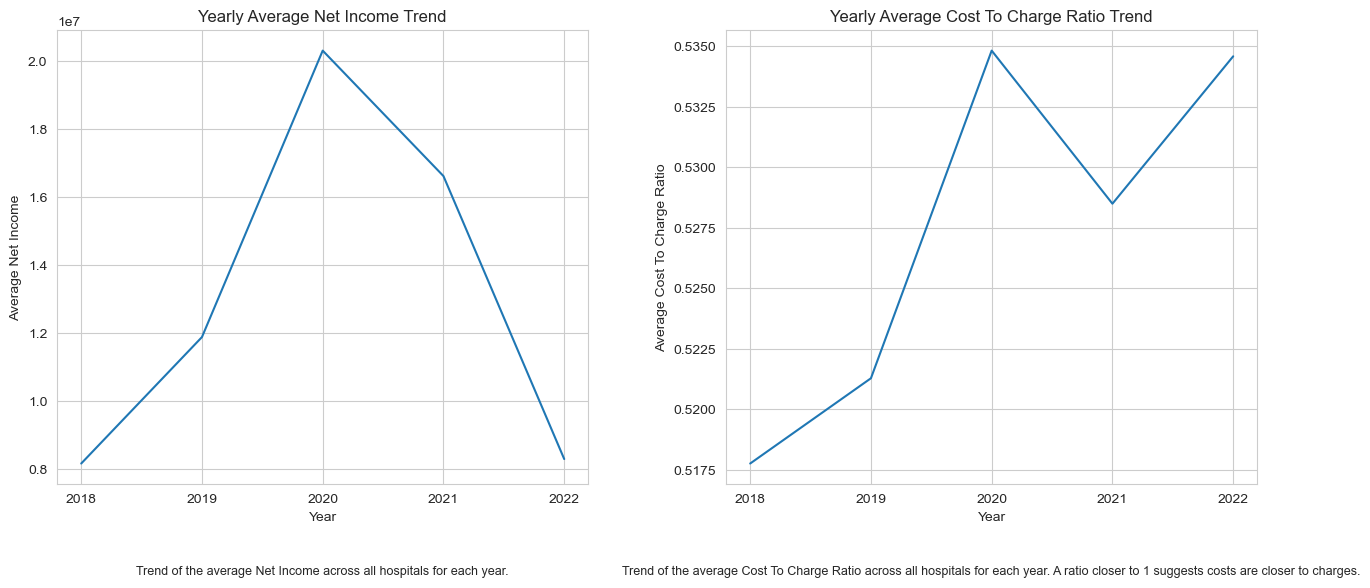

In [95]:
# --- Evaluate Financial Trends---
# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the trend analysis is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the column names for Net Income and Cost To Charge Ratio.
    # Using variables makes the code easier to read and modify if column names change.
    net_income_col = 'Net Income'
    cost_to_charge_col = 'Cost To Charge Ratio'

    # Define a list of required columns for this specific analysis (Year, Net Income, Cost To Charge Ratio).
    required_cols = ['Year', net_income_col, cost_to_charge_col]
    # Check if all required columns are present in the DataFrame.
    if all(col in df_hospital_integrated.columns for col in required_cols):

        # Ensure the financial columns are numeric types.
        # .astype(str) is used first to handle potential non-numeric data gracefully before coercion.
        # errors='coerce' will turn any values that cannot be converted to numeric into NaN.
        for col in [net_income_col, cost_to_charge_col]:
             df_hospital_integrated[col] = pd.to_numeric(df_hospital_integrated[col].astype(str), errors='coerce')

        # Create a copy of the DataFrame and drop rows where any of the required columns are NaN
        # after the numeric coercion. This ensures that only complete data points are used for trends.
        df_trend = df_hospital_integrated.dropna(subset=required_cols).copy()

        # Check if the DataFrame is still not empty after dropping NaNs.
        if not df_trend.empty:
            # Aggregate the data by 'Year'.
            # Calculate the mean of 'Net Income' and 'Cost To Charge Ratio' for each year.
            # reset_index() converts the grouped output back into a DataFrame.
            yearly_financial_trends = df_trend.groupby('Year')[[net_income_col, cost_to_charge_col]].mean().reset_index()

            # Print the aggregated yearly financial trends.
            print("\nYearly Average Financial Trends (2018-2022):")
            print(yearly_financial_trends)

            # --- Plotting the trends ---
            # Create a figure and a set of subplots. figsize sets the overall size of the figure.
            plt.figure(figsize=(14, 6))

            # Create the first subplot for the Net Income trend.
            plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot position
            # Use seaborn's lineplot to visualize the trend of average Net Income over the years.
            sns.lineplot(x='Year', y=net_income_col, data=yearly_financial_trends)
            # Set the title for the first plot.
            plt.title(f'Yearly Average {net_income_col} Trend')
            # Set the x-axis label.
            plt.xlabel('Year')
            # Set the y-axis label.
            plt.ylabel(f'Average {net_income_col}')
            # Ensure that all unique years are shown as ticks on the x-axis if 'Year' is a column.
            if 'Year' in yearly_financial_trends.columns:
                 plt.xticks(yearly_financial_trends['Year']) # Ensure all years are ticks
            # Add a text box below the plot to explain what the plot shows (acting as a tooltip).
            plt.text(0.5, -0.2, f"Trend of the average {net_income_col} across all hospitals for each year.", size=9, ha="center",
                     transform=plt.gca().transAxes)


            # Create the second subplot for the Cost To Charge Ratio trend.
            plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot position
            # Use seaborn's lineplot to visualize the trend of average Cost To Charge Ratio over the years.
            sns.lineplot(x='Year', y=cost_to_charge_col, data=yearly_financial_trends)
            # Set the title for the second plot.
            plt.title(f'Yearly Average {cost_to_charge_col} Trend')
            # Set the x-axis label.
            plt.xlabel('Year')
            # Set the y-axis label.
            plt.ylabel(f'Average {cost_to_charge_col}')
            # Ensure that all unique years are shown as ticks on the x-axis if 'Year' is a column.
            if 'Year' in yearly_financial_trends.columns:
                 plt.xticks(yearly_financial_trends['Year']) # Ensure all years are ticks
            # Add a text box below the plot to explain what the plot shows and interpret the ratio.
            plt.text(0.5, -0.2, f"Trend of the average {cost_to_charge_col} across all hospitals for each year. A ratio closer to 1 suggests costs are closer to charges.", size=9, ha="center",
                     transform=plt.gca().transAxes)


            # Adjust the layout of the subplots to prevent titles or labels from overlapping.
            plt.tight_layout() # Adjust layout to prevent overlap
            # Display the generated plots.
            plt.show()

        # If the DataFrame is empty after dropping NaNs, print a message.
        else:
            print("DataFrame is empty after dropping NaNs for trend analysis.")

    # If required columns are missing from the DataFrame, print a message listing the missing columns.
    else:
        missing = [col for col in required_hospital_integrated.columns if col not in df_hospital_integrated.columns]
        print(f"Skipping Financial Trend Analysis: Required columns missing - {missing}")

# If the DataFrame was not loaded or is empty initially, print a message indicating this.
else:
    print("Skipping Financial Trend Analysis: DataFrame not loaded or is empty.")


Calculating correlations with performance metrics: ['Net Income', 'Cost To Charge Ratio']
Correlating with 48 other numeric variables.

--- Correlations with Net Income (sorted by absolute value) ---
Total Income                                                 0.975763
Net Income from Service to Patients                          0.563364
Net Patient Revenue                                          0.445752
Total Other Income                                           0.357415
Total Revenue                                                0.356882
Total Patient Revenue                                        0.348403
Combined Outpatient + Inpatient Total Charges                0.345116
Outpatient Total Charges                                     0.343616
Outpatient Revenue                                           0.338789
Inpatient Revenue                                            0.325580
Inpatient Total Charges                                      0.324497
Contractual Allowance and Disc

C:\Users\yadla\AppData\Local\Temp\ipykernel_5544\1867573910.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_correlations.values, y=plot_correlations.index, palette='coolwarm')


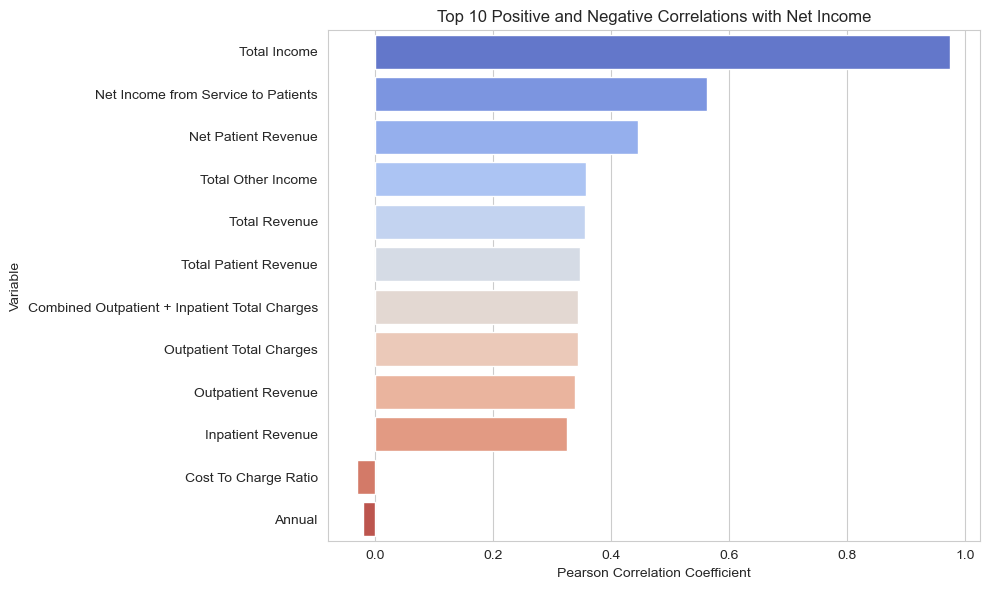


--- Correlations with Cost To Charge Ratio (sorted by absolute value) ---
Total_Yearly_Medicare_Enrollment                            -0.041316
Hospital Total Days Or Visits                               -0.034123
Total Income                                                -0.030486
Net Income                                                  -0.030031
Outpatient Total Charges                                    -0.029583
Combined Outpatient + Inpatient Total Charges               -0.028713
Inpatient Total Charges                                     -0.027296
Contractual Allowance and Discounts on Patients' Accounts   -0.025458
Total Patient Revenue                                       -0.024996
Inpatient Revenue                                           -0.024890
Total Bad Debt Expense                                      -0.024872
Total Revenue                                               -0.024402
Outpatient Revenue                                          -0.023982
Net Income from

C:\Users\yadla\AppData\Local\Temp\ipykernel_5544\1867573910.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_correlations.values, y=plot_correlations.index, palette='coolwarm')


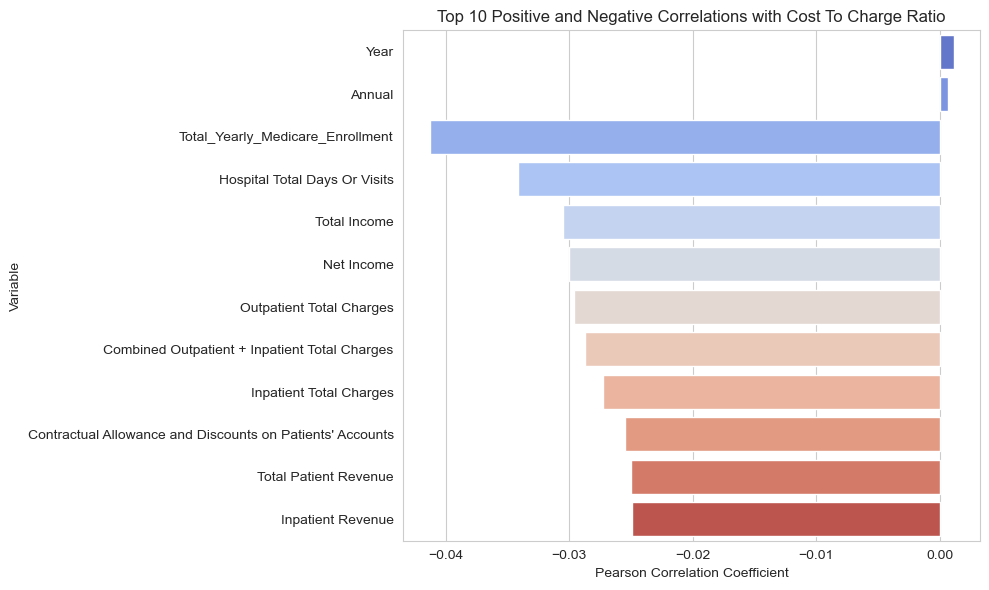

In [97]:
# --- Correlation Analysis with Performance Metrics---
# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the analysis is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the performance metrics that will be used as the basis for correlation analysis.
    # These are the key variables whose relationships with other variables we want to explore.
    performance_metrics = ['Net Income', 'Cost To Charge Ratio']

    # Filter the list of defined performance metrics to include only those actually present in the DataFrame columns.
    present_performance_metrics = [col for col in performance_metrics if col in df_hospital_integrated.columns]

    # Check if any of the performance metrics are present in the DataFrame.
    if not present_performance_metrics:
        # If none are found, print a message and skip the analysis.
        print("Skipping Correlation Analysis: Neither 'Net Income' nor 'Cost To Charge Ratio' found in DataFrame.")
    else:
        # If at least one metric is present, print which ones will be used.
        print(f"Calculating correlations with performance metrics: {present_performance_metrics}")

        # Identify all columns in the DataFrame that have a numeric data type.
        all_numeric_cols = [col for col in df_hospital_integrated.columns if pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]
        # Create a list of numeric columns excluding the performance metrics themselves.
        # These are the variables we will correlate *against* the performance metrics.
        other_numeric_cols = [col for col in all_numeric_cols if col not in present_performance_metrics]

        # Check if there are any other numeric columns to correlate with.
        if not other_numeric_cols:
            # If none are found, print a message and skip the correlation calculation part.
            print("Skipping Correlation Analysis: No other numeric columns found to correlate with.")
        else:
            # If other numeric columns exist, print how many will be used in the correlation.
            print(f"Correlating with {len(other_numeric_cols)} other numeric variables.")

            # Combine the list of present performance metrics and the other numeric columns.
            # This list defines the subset of columns to be used for the correlation matrix calculation.
            cols_for_correlation = present_performance_metrics + other_numeric_cols

            # Select the subset of the DataFrame containing only the columns needed for correlation.
            # A .copy() is used to avoid SettingWithCopyWarning later if modifications were made.
            df_correlation_subset = df_hospital_integrated[cols_for_correlation].copy()

            # Ensure all selected columns are numeric types, coercing errors to NaN.
            # This step is a safeguard, although all_numeric_cols should already be numeric.
            for col in cols_for_correlation:
                 df_correlation_subset[col] = pd.to_numeric(df_correlation_subset[col].astype(str), errors='coerce')

            # Drop any rows from the subset DataFrame that contain NaN values in any of the selected columns.
            # Correlation requires complete data points.
            df_correlation_subset = df_correlation_subset.dropna()

            # Check if the DataFrame subset is still not empty after dropping NaNs.
            if not df_correlation_subset.empty:
                # Calculate the Pearson correlation matrix for the subset of numeric columns.
                correlation_matrix = df_correlation_subset.corr()

                # Iterate through each of the performance metrics that were found in the DataFrame.
                for metric in present_performance_metrics:
                    # Check if the current metric is a column in the calculated correlation matrix.
                    if metric in correlation_matrix.columns:
                        # Get the column from the correlation matrix corresponding to the current metric.
                        # This column contains the correlation of the metric with all other variables.
                        # drop(metric, errors='ignore') removes the correlation of the metric with itself (which is always 1).
                        # sort_values(key=abs, ascending=False) sorts the correlations by their absolute value in descending order.
                        metric_correlations = correlation_matrix[metric].drop(metric, errors='ignore').sort_values(key=abs, ascending=False)

                        # Print the correlations for the current metric, sorted by absolute value.
                        print(f"\n--- Correlations with {metric} (sorted by absolute value) ---")
                        print(metric_correlations)

                        # --- Plotting the top positive and negative correlations ---
                        # Define how many of the top positive and negative correlations to plot.
                        num_to_plot = 10 # Number of top positive/negative correlations to plot

                        # Get the top positive correlations from the sorted Series.
                        top_positive = metric_correlations[metric_correlations > 0].head(num_to_plot)
                        # Get the top negative correlations from the sorted Series.
                        # head() here gets the 'num_to_plot' smallest (most negative) values.
                        top_negative = metric_correlations[metric_correlations < 0].head(num_to_plot) # head() gets the most negative (smallest values)

                        # Concatenate the top positive and negative correlations into a single Series for plotting.
                        # This handles cases where a variable might appear in both lists (though unlikely with correlation).
                        plot_correlations = pd.concat([top_positive, top_negative])

                        # Check if there are any correlations to plot after selecting the top ones.
                        if not plot_correlations.empty:
                            # Create a new figure for the bar plot.
                            # Adjust figure height based on the number of bars to ensure readability.
                            plt.figure(figsize=(10, max(6, len(plot_correlations) * 0.5))) # Adjust figure height based on number of bars
                            # Create a horizontal bar plot using seaborn.
                            # x is the correlation value, y is the variable name.
                            # palette='coolwarm' provides a color scheme that highlights positive (warm) and negative (cool) correlations.
                            sns.barplot(x=plot_correlations.values, y=plot_correlations.index, palette='coolwarm')
                            # Set the title of the plot.
                            plt.title(f'Top {num_to_plot} Positive and Negative Correlations with {metric}')
                            # Set the x-axis label.
                            plt.xlabel('Pearson Correlation Coefficient')
                            # Set the y-axis label.
                            plt.ylabel('Variable')
                            # Adjust the layout to prevent labels from overlapping.
                            plt.tight_layout()
                            # Display the plot.
                            plt.show()
                        # If no correlations met the criteria for plotting (e.g., all were zero or very small), print a message.
                        else:
                            print(f"No significant correlations found to plot for {metric}.")

                    # If a defined performance metric was not found as a column in the correlation matrix (shouldn't happen if present_performance_metrics check worked), print a warning.
                    else:
                        print(f"Warning: Metric '{metric}' not found in the correlation matrix columns.")

            # If the DataFrame subset is empty after dropping NaNs, print a message.
            else:
                print("DataFrame is empty after dropping NaNs for correlation calculation.")

# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Correlation Analysis: DataFrame not loaded or is empty.")



Yearly Aggregated Trends (Mean for all plotted metrics):
   Year  Total Revenue  Net Patient Revenue  Cost To Charge Ratio  \
0  2018   7.283983e+08         1.908318e+08              0.517762   
1  2019   7.790025e+08         1.983414e+08              0.521285   
2  2020   8.159015e+08         2.033572e+08              0.534820   
3  2021   9.120519e+08         2.271636e+08              0.528496   
4  2022   9.713737e+08         2.406397e+08              0.534585   

   Contractual Allowance and Discounts on Patients' Accounts  
0                                       5.230459e+08          
1                                       5.592848e+08          
2                                       5.800438e+08          
3                                       6.582801e+08          
4                                       7.115279e+08          


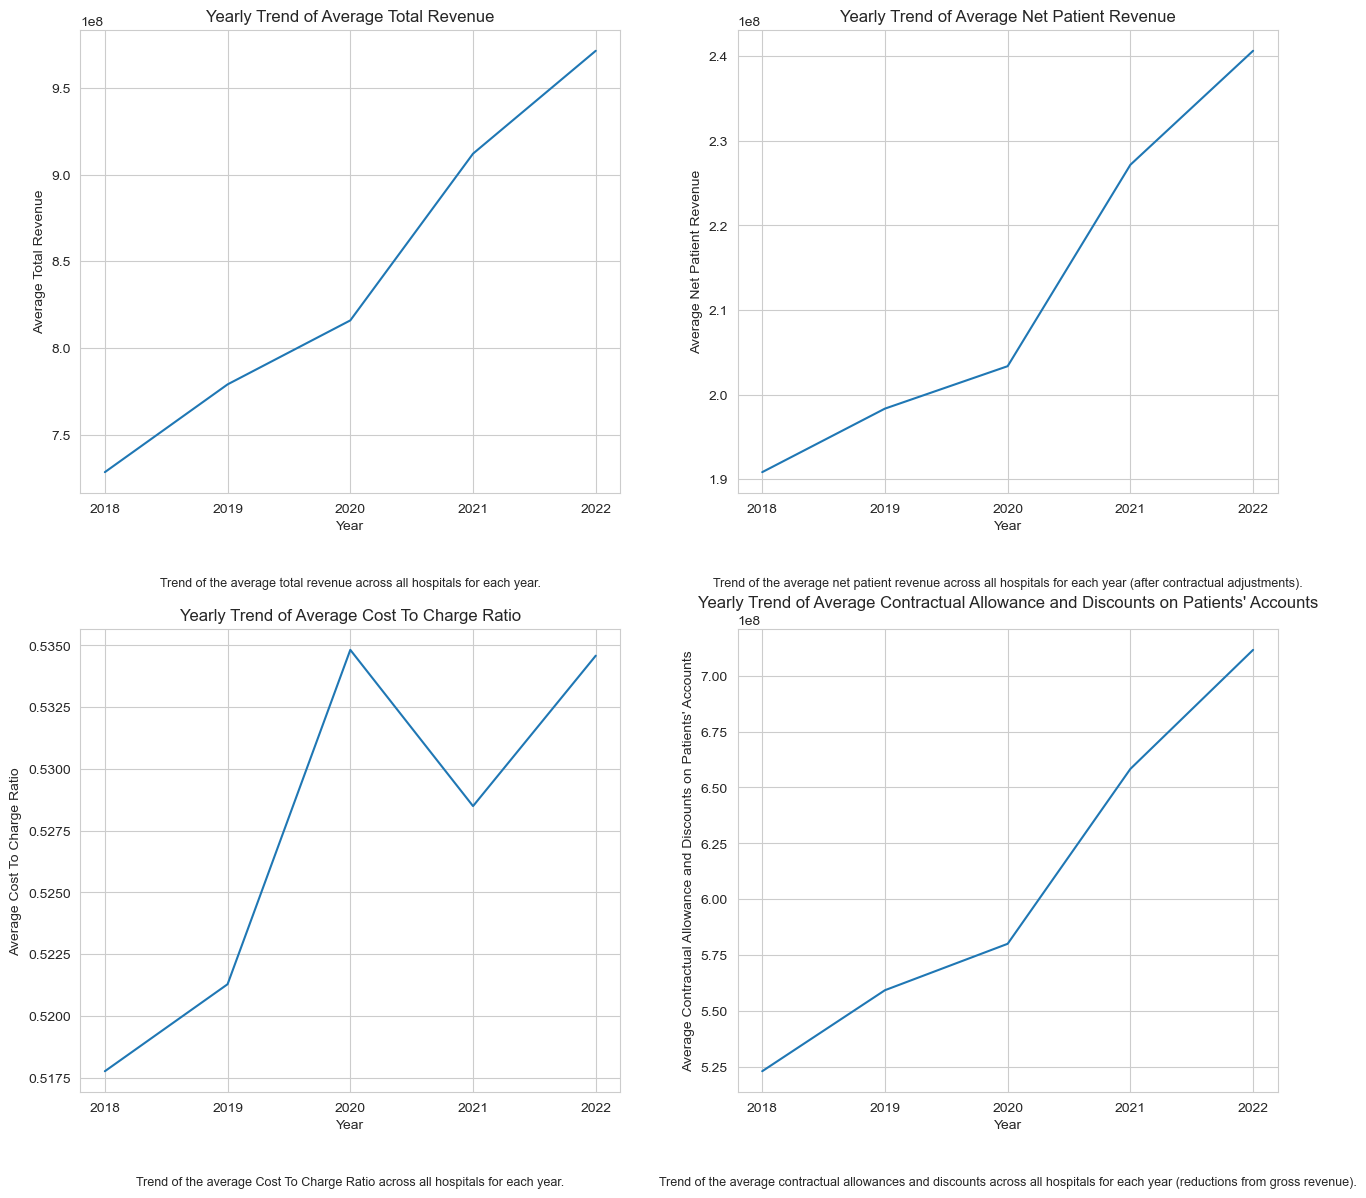

In [99]:
# --- Trend Analysis Plots (Financial Metrics) ---
# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the analysis and plotting are only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the list of financial columns that will be used for trend analysis.
    # These are the specific metrics whose yearly averages we want to visualize.
    trend_cols = [
        'Total Revenue',
        'Net Patient Revenue',
        'Cost To Charge Ratio',
        'Contractual Allowance and Discounts on Patients\' Accounts'
    ]

    # Filter the list of defined trend columns to include only those actually present in the DataFrame columns.
    present_trend_cols = [col for col in trend_cols if col in df_hospital_integrated.columns]

    # Check if at least one of the specified trend columns is present AND if the 'Year' column is present.
    # 'Year' is essential for performing a time-based trend analysis.
    if len(present_trend_cols) >= 1 and 'Year' in df_hospital_integrated.columns:

        # Ensure the columns selected for trend analysis are numeric types.
        # .astype(str) is used first to handle potential non-numeric data gracefully before coercion.
        # errors='coerce' will turn any values that cannot be converted to numeric into NaN.
        for col in present_trend_cols:
             df_hospital_integrated[col] = pd.to_numeric(df_hospital_integrated[col].astype(str), errors='coerce')

        # Define the aggregation method for the trend columns when grouping by year.
        # Here, we specify that the 'mean' should be calculated for each of the present trend columns.
        aggregation_dict = {col: 'mean' for col in present_trend_cols}

        # Check if the aggregation dictionary is not empty (meaning there are columns to aggregate).
        if aggregation_dict:
            # Group the DataFrame by 'Year'.
            # Select the columns specified in the aggregation_dict keys.
            # Use .agg() to apply the specified aggregation function (mean) to these columns for each year.
            # reset_index() converts the grouped output back into a DataFrame.
            yearly_trends = df_hospital_integrated.groupby('Year')[list(aggregation_dict.keys())].agg(aggregation_dict).reset_index()

            # Print the resulting DataFrame showing the yearly aggregated trends.
            print("\nYearly Aggregated Trends (Mean for all plotted metrics):")
            print(yearly_trends)

            # --- Plotting the trends ---
            # Calculate the number of plots needed (one for each trend column).
            n_plots = len(yearly_trends.columns) - 1 # Exclude 'Year' column
            # Define the desired number of columns for the subplot grid.
            n_cols = 2 # Number of columns for subplots
            # Calculate the number of rows needed for the subplot grid based on the number of plots and columns.
            n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed

            # Create a figure and a grid of subplots.
            # Adjust the figure size based on the number of rows to ensure plots are not too small.
            plt.figure(figsize=(14, n_rows * 6)) # Adjusted figure size

            # Loop through each column in the aggregation dictionary (each trend metric).
            for i, col in enumerate(aggregation_dict.keys()):
                # Create a subplot at the current position (i+1) in the grid.
                plt.subplot(n_rows, n_cols, i + 1)
                # Use seaborn's lineplot to visualize the trend of the average of the current column over the years.
                sns.lineplot(x='Year', y=col, data=yearly_trends)
                # Set the title for the current subplot.
                plt.title(f'Yearly Trend of Average {col}')
                # Set the x-axis label.
                plt.xlabel('Year')
                # Set the y-axis label, indicating it's the average value.
                plt.ylabel(f'Average {col}')
                # Ensure that all unique years are shown as ticks on the x-axis if 'Year' is a column.
                if 'Year' in yearly_trends.columns:
                    plt.xticks(yearly_trends['Year']) # Ensure all years are ticks

                # --- Tooltip explanation based on column ---
                # Define a tooltip string based on the specific column being plotted.
                if col == 'Total Revenue':
                    tooltip = "Trend of the average total revenue across all hospitals for each year."
                elif col == 'Net Patient Revenue':
                    tooltip = "Trend of the average net patient revenue across all hospitals for each year (after contractual adjustments)."
                elif col == 'Cost To Charge Ratio':
                    tooltip = "Trend of the average Cost To Charge Ratio across all hospitals for each year."
                elif col == 'Contractual Allowance and Discounts on Patients\' Accounts':
                    tooltip = "Trend of the average contractual allowances and discounts across all hospitals for each year (reductions from gross revenue)."
                else:
                    # A generic tooltip for any other column.
                    tooltip = f"Trend of Average {col} over time."

                # Add the tooltip text below the current subplot.
                # transform=plt.gca().transAxes positions the text relative to the axes of the current subplot.
                plt.text(0.5, -0.2, tooltip, size=9, ha="center",
                         transform=plt.gca().transAxes)


            # Adjust the layout of the subplots to prevent titles, labels, or plots from overlapping.
            plt.tight_layout() # Adjust layout to prevent overlap
            # Display the generated plots.
            plt.show()

        # If the aggregation dictionary is empty after filtering (shouldn't happen if present_trend_cols check passed, but included as a safeguard).
        else:
            print("No columns available for aggregation after filtering.")

    # If the 'Year' column is missing, print a message and skip plotting.
    elif 'Year' not in df_hospital_integrated.columns:
        print("Skipping Trend Analysis Plots: 'Year' column is missing.")
    # If none of the specified trend columns were found in the DataFrame, print a message and skip plotting.
    else:
        print("Skipping Trend Analysis Plots: None of the specified trend columns were found in the DataFrame.")

# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Trend Analysis Plots: DataFrame not loaded or is empty.")


In [101]:
# --- Classification Model (Logistic Regression for Profitability) with Significance and Metrics ---

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the modeling process is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the original column name used to determine profitability.
    target_col_original = 'Net Income'
    # Check if the original target column is present in the DataFrame.
    if target_col_original in df_hospital_integrated.columns:
        # Ensure the original target column ('Net Income') is numeric.
        # .astype(str) is used first to handle potential non-numeric data gracefully before coercion.
        # errors='coerce' will turn any values that cannot be converted to numeric into NaN.
        df_hospital_integrated[target_col_original] = pd.to_numeric(df_hospital_integrated[target_col_original].astype(str), errors='coerce')

        # Create a copy of the DataFrame and drop rows where the original target variable ('Net Income') is NaN.
        # This is crucial because we cannot determine profitability status for rows with missing Net Income.
        df_model_data = df_hospital_integrated.dropna(subset=[target_col_original]).copy()

        # Check if the DataFrame is still not empty after dropping NaNs for the target column.
        if not df_model_data.empty:
            # Create the binary target variable 'Is_Profitable' in the filtered copy.
            # It's 1 if 'Net Income' is greater than 0 (profitable), and 0 otherwise (not profitable).
            df_model_data['Is_Profitable'] = (df_model_data[target_col_original] > 0).astype(int)

            # --- Handle adding 'Is_Profitable' back to the main DataFrame ---
            # This section ensures the 'Is_Profitable' column is available in the main df_hospital_integrated
            # for potential later steps, while the modeling uses the cleaned df_model_data.
            # Drop the column from the main DataFrame if it already exists to avoid errors on re-run.
            if 'Is_Profitable' in df_hospital_integrated.columns:
                print("Overwriting existing 'Is_Profitable' column.")
                df_hospital_integrated = df_hospital_integrated.drop('Is_Profitable', axis=1)
            # Join the newly created 'Is_Profitable' column from the filtered data back to the main DataFrame.
            # This uses the index to align the values. Rows that were dropped due to NaN Net Income
            # in df_model_data will have NaN for 'Is_Profitable' in df_hospital_integrated after the join.
            df_hospital_integrated = df_hospital_integrated.join(df_model_data['Is_Profitable'])


            # Print confirmation and the distribution of the new target variable.
            print("Created 'Is_Profitable' target variable (1 if Net Income > 0, 0 otherwise) in main DataFrame.")
            print("Value counts for target variable (data used for modeling):\n", df_model_data['Is_Profitable'].value_counts())


            # --- Define Features (X) ---
            # Define candidate feature columns by excluding identifiers, group labels, the original target, and the new binary target.
            # This list is based on the assumption that these columns are not suitable as independent variables in the model.
            feature_cols_candidates = [col for col in df_model_data.columns if col not in [
                'Year', 'facility_id', 'Hospital Name', 'State Code', 'County',
                'Rural Versus Urban', target_col_original, 'Is_Profitable',
                'Performance_Group_Quartile', 'Is_Top_Quartile', 'Cluster_Label' # Exclude other generated columns
                ]]

            # Filter the candidate features to keep only those that are numeric data types.
            feature_cols = [col for col in feature_cols_candidates if pd.api.types.is_numeric_dtype(df_model_data[col])]

            # Check if there are any valid feature columns identified.
            if feature_cols:
                # Select the feature columns from the model data DataFrame.
                X = df_model_data[feature_cols]
                # Select the target variable column.
                y = df_model_data['Is_Profitable']

                # --- Handle Missing Values in Features ---
                # Ensure all selected feature columns are numeric, coercing errors to NaN.
                # Then, fill any remaining NaN values in the features with the mean of the respective column.
                # This is a common strategy for handling missing data in numerical features for modeling.
                X = X.apply(lambda series: pd.to_numeric(series.astype(str), errors='coerce')).fillna(X.mean())

                # Optional check: Verify if any NaNs still exist in the features after filling.
                # (Should ideally be none if the mean calculation and filling were successful).
                if X.isnull().sum().sum() > 0:
                    print("Warning: NaNs still present in features after filling.")
                    # Print columns that still have NaNs and their counts.
                    print(X.isnull().sum()[X.isnull().sum() > 0])

                # --- Split data into training and testing sets ---
                print("\nSplitting data into training and testing sets (80/20 split)...")
                # Split the feature matrix (X) and target vector (y) into training and testing sets.
                # test_size=0.2 means 20% of the data will be used for testing, 80% for training.
                # random_state=42 ensures reproducibility of the split.
                # stratify=y ensures that the proportion of the target variable classes (0s and 1s) is the same in both training and testing sets.
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution
                # Print the shapes of the resulting training and testing sets.
                print(f"Training set shape: {X_train.shape}")
                print(f"Testing set shape: {X_test.shape}")


                # --- Prepare data for statsmodels ---
                # Add a constant column to the feature matrices (X_train and X_test).
                # This represents the intercept (or bias term) in the logistic regression model, which is required by statsmodels' API.
                X_train = sm.add_constant(X_train)
                X_test = sm.add_constant(X_test)


                # --- Initialize and train the Logistic Regression model using statsmodels ---
                print("\nTraining Logistic Regression Model (using statsmodels) on training data...")
                # Initialize the Logit model from statsmodels.
                # Logit is used for binary logistic regression.
                model = sm.Logit(y_train, X_train)
                # Fit the model to the training data.
                result = model.fit()
                print("Model training complete.")

                # Print the summary of the trained model.
                # This summary includes coefficients, standard errors, z-statistics, p-values (significance), and other model statistics.
                print("\n--- Logistic Regression Model Summary (Trained on Training Data) ---")
                print(result.summary())

                # --- Make predictions and evaluate on Training Set ---
                print("\n--- Evaluation on Training Set ---")
                # Predict the probability of the positive class (Is_Profitable=1) for the training set.
                y_train_pred_prob = result.predict(X_train)
                # Convert the predicted probabilities into binary class predictions (0 or 1).
                # A threshold of 0.5 is commonly used: if probability > 0.5, predict 1; otherwise, predict 0.
                y_train_pred = (y_train_pred_prob > 0.5).astype(int)

                # Calculate the accuracy of the model on the training set.
                train_accuracy = accuracy_score(y_train, y_train_pred)
                # Calculate the confusion matrix for the training set predictions.
                # This matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
                train_conf_matrix = confusion_matrix(y_train, y_train_pred)

                # Print the calculated accuracy and confusion matrix for the training set.
                print(f"Training Accuracy: {train_accuracy:.4f}")
                print("\nTraining Confusion Matrix:")
                print(train_conf_matrix)
                # The classification report provides precision, recall, f1-score, and support for each class.
                # It is commented out here but can be uncommented for more detailed evaluation.
                # print("\nTraining Classification Report:")
                # print(classification_report(y_train, y_train_pred))


                # --- Make predictions and evaluate on Testing Set ---
                print("\n--- Evaluation on Testing Set ---")
                # Predict the probability of the positive class (Is_Profitable=1) for the testing set.
                y_test_pred_prob = result.predict(X_test)
                # Convert the predicted probabilities into binary class predictions (0 or 1) using the 0.5 threshold.
                y_test_pred = (y_test_pred_prob > 0.5).astype(int)

                # Calculate the accuracy of the model on the testing set.
                test_accuracy = accuracy_score(y_test, y_test_pred)
                # Calculate the confusion matrix for the testing set predictions.
                test_conf_matrix = confusion_matrix(y_test, y_test_pred)

                # Print the calculated accuracy and confusion matrix for the testing set.
                print(f"Testing Accuracy: {test_accuracy:.4f}")
                print("\nTesting Confusion Matrix:")
                print(test_conf_matrix)
                # The classification report for the testing set.
                # print("\nTesting Classification Report:")
                # print(classification_report(y_test, y_test_pred)) # Optional: More detailed report


                # Print a separator line for clarity.
                print("-" * 30)


            # If the DataFrame is empty after dropping NaNs for the target column, print a message.
            else:
                print(f"Skipping Classification Model: DataFrame is empty after dropping NaNs for target column ('{target_col_original}').")

        # If the target column has no valid data after dropping NaNs, print a message.
        else:
            print(f"Skipping Classification Model: Target column ('{target_col_original}') has no valid data after dropping NaNs.")

    # If the original target column ('Net Income') is not found in the DataFrame, print a message.
    else:
        print(f"Skipping Classification Model: Target column ('{target_col_original}') not found in the DataFrame.")

# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Classification Model: DataFrame not loaded or is empty.")


Created 'Is_Profitable' target variable (1 if Net Income > 0, 0 otherwise) in main DataFrame.
Value counts for target variable (data used for modeling):
 Is_Profitable
1    16995
0     7790
Name: count, dtype: int64

Splitting data into training and testing sets (80/20 split)...
Training set shape: (19828, 48)
Testing set shape: (4957, 48)

Training Logistic Regression Model (using statsmodels) on training data...
Optimization terminated successfully.
         Current function value: 0.346906
         Iterations 11
Model training complete.

--- Logistic Regression Model Summary (Trained on Training Data) ---
                           Logit Regression Results                           
Dep. Variable:          Is_Profitable   No. Observations:                19828
Model:                          Logit   Df Residuals:                    19779
Method:                           MLE   Df Model:                           48
Date:                Thu, 08 May 2025   Pseudo R-squ.:              

Calculating average Net Income for quartile analysis.

5-Year Average Net Income Quartiles:
  Q1 (25th percentile): -126,583.15
  Q3 (75th percentile): 11,927,607.60

Number of facilities in Top Quartile: 1231
Number of facilities in Bottom Quartile: 1231

'Performance_Group_Quartile' column already exists. Overwriting.
Updated 'Performance_Group_Quartile' column in df_hospital_integrated.

Generating boxplots for metrics (normalized by Hospital Total Days Or Visits where applicable) with outliers hidden:


C:\Users\yadla\AppData\Local\Temp\ipykernel_5544\3624443640.py:216: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout() # Adjust layout to prevent overlap


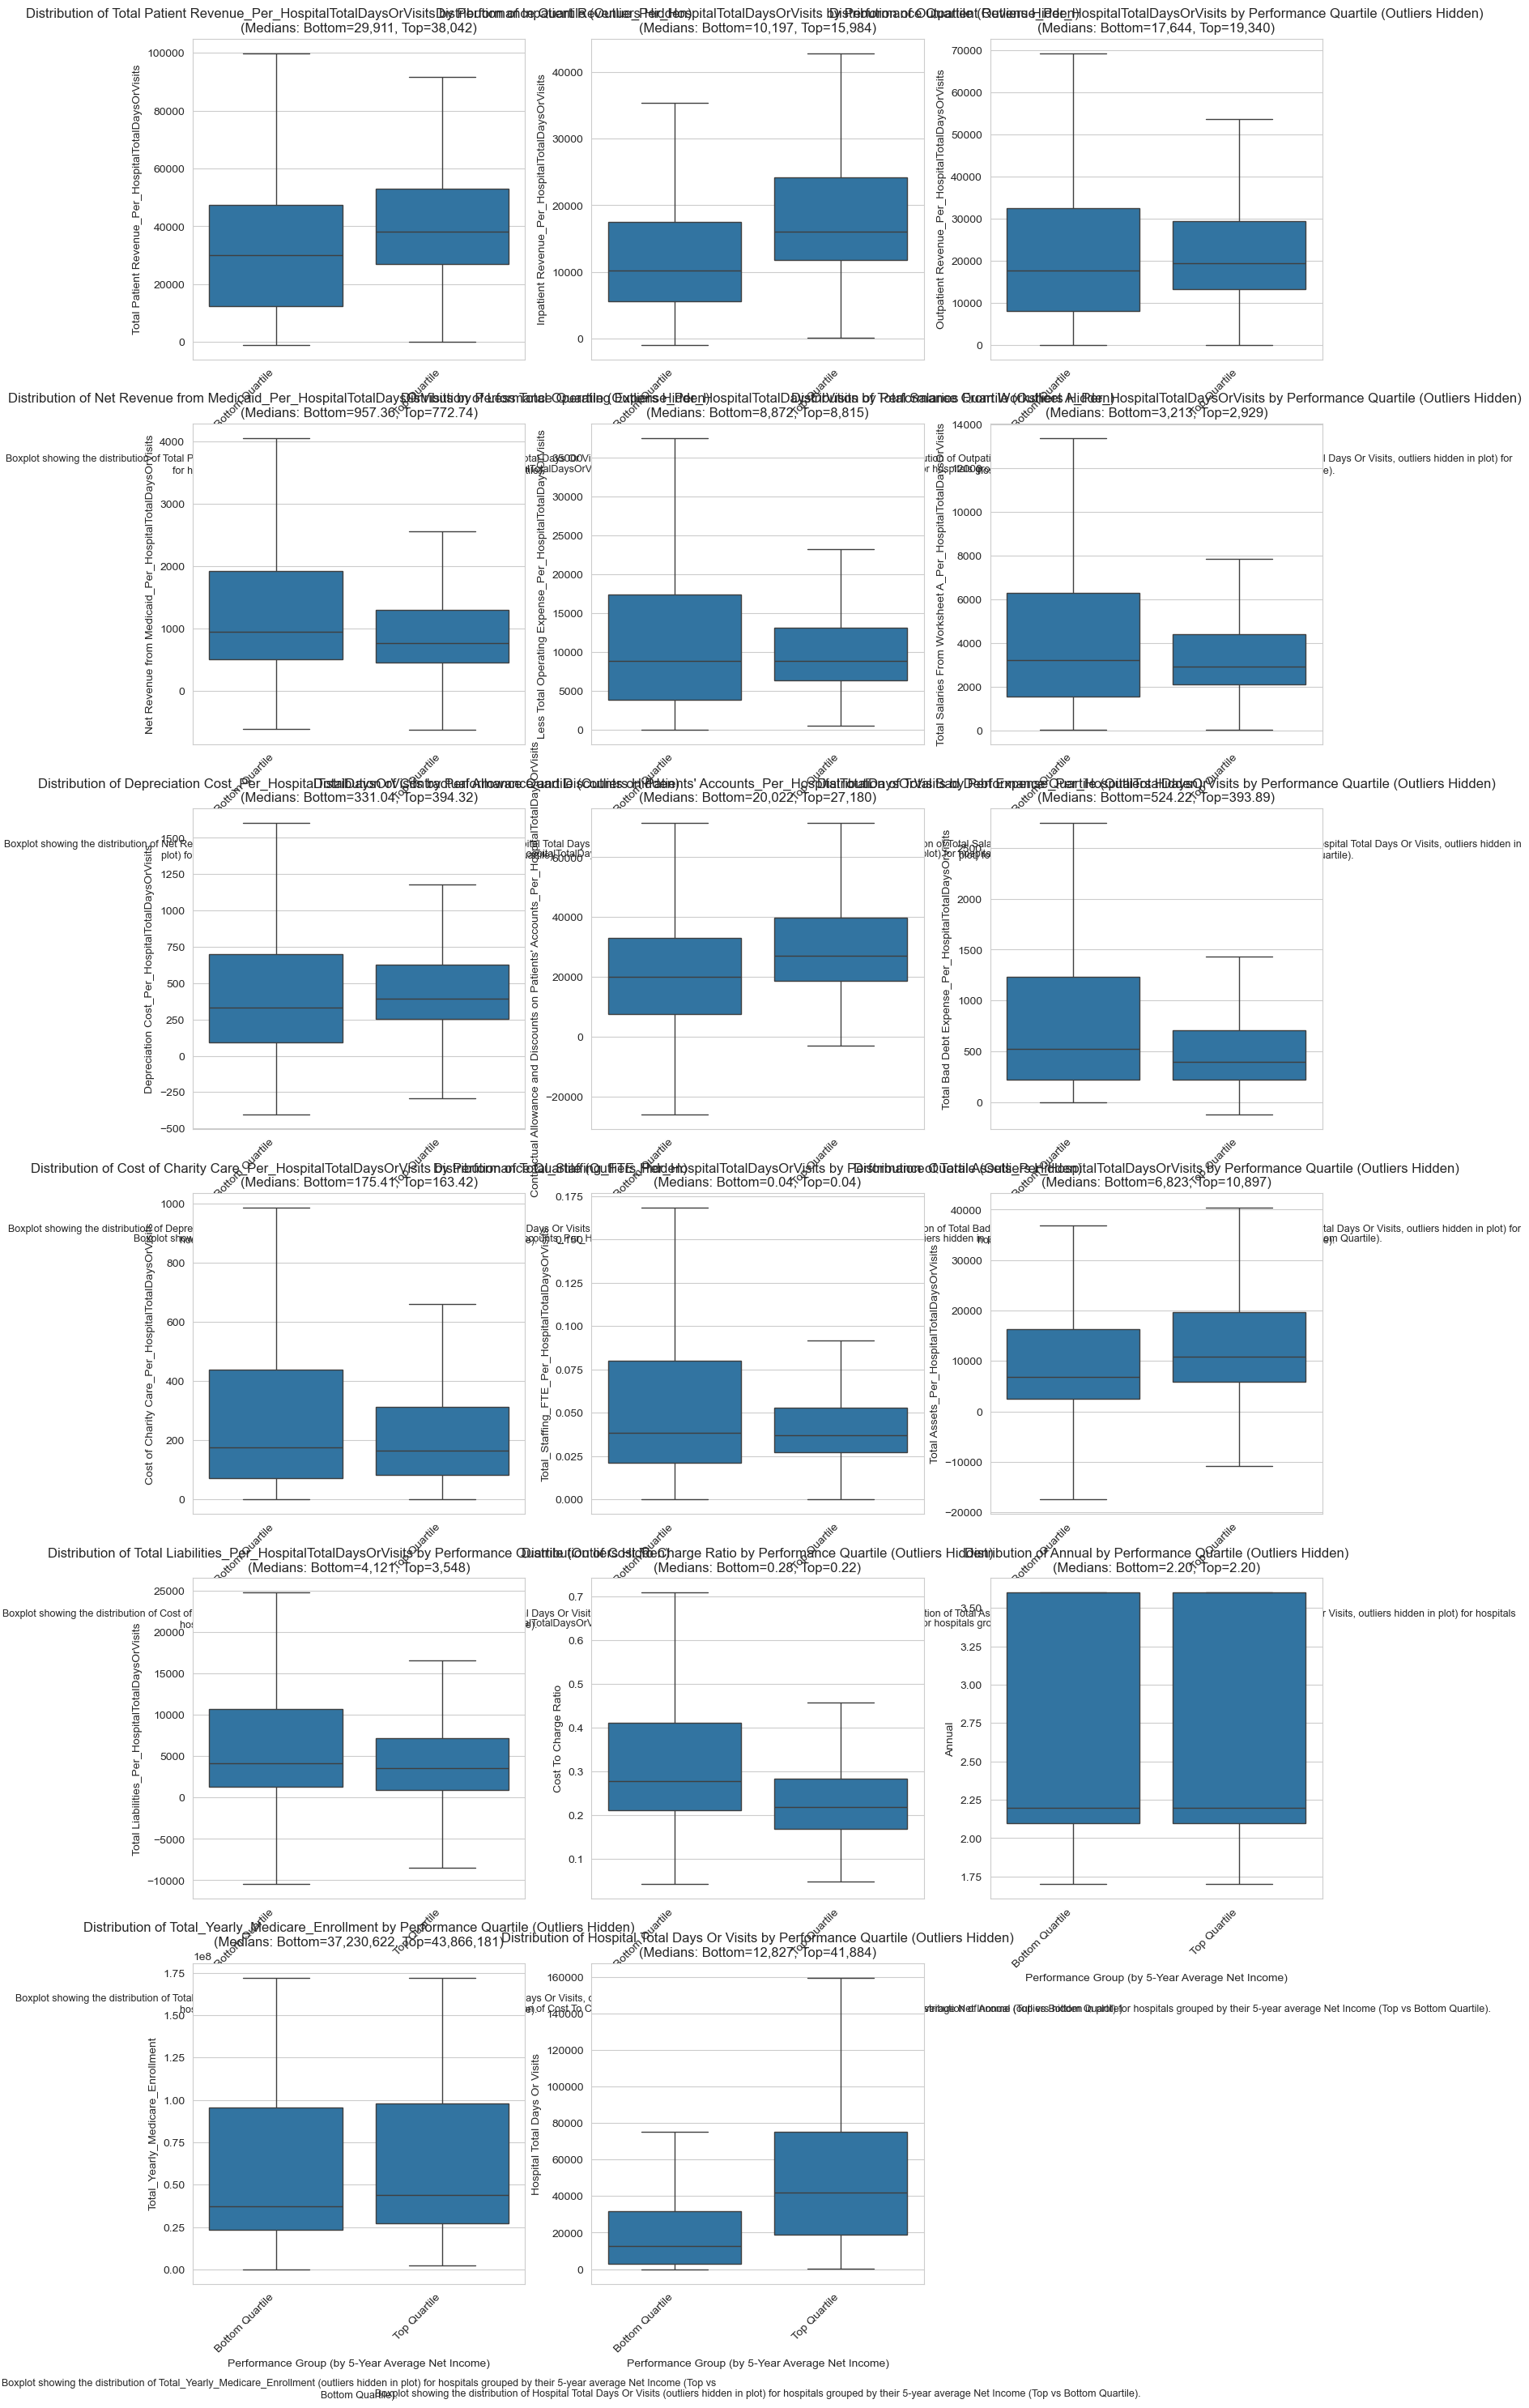

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_hospital_integrated is already loaded and contains the necessary data.
# The dummy data creation section has been removed as requested.

# --- Compare Financial Metrics with Boxplots (Top vs Bottom Quartile) ---

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the quartile analysis and plotting are only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the performance metric that will be used to calculate the quartiles.
    # This is the basis for grouping hospitals into top, bottom, and other performance groups.
    net_income_col_for_quartile = 'Net Income'

    # Define the required columns for performing the quartile analysis and subsequent normalization.
    # 'Year' and 'facility_id' are needed for grouping, the net income column for calculating the average,
    # and 'Hospital Total Days Or Visits' for normalization.
    required_cols_quartile = ['Year', 'facility_id', net_income_col_for_quartile, 'Hospital Total Days Or Visits']
    # Check if all required columns are present in the DataFrame.
    if all(col in df_hospital_integrated.columns for col in required_cols_quartile):

        # Create a copy of the DataFrame to avoid modifying the original during quartile calculation.
        df_quartile = df_hospital_integrated.copy()

        # Ensure the required columns for quartile analysis are numeric types, coercing errors to NaN.
        for col in [net_income_col_for_quartile, 'Hospital Total Days Or Visits']:
             df_quartile[col] = pd.to_numeric(df_quartile[col].astype(str), errors='coerce')

        # Drop rows where essential columns for quartile analysis are still NaN after coercion.
        # Missing values in these columns would prevent accurate grouping and normalization.
        df_quartile = df_quartile.dropna(subset=[net_income_col_for_quartile, 'facility_id', 'Year', 'Hospital Total Days Or Visits'])

        # Check if the DataFrame is still not empty after dropping NaNs.
        if not df_quartile.empty:
            print(f"Calculating average {net_income_col_for_quartile} for quartile analysis.")

            # Calculate the 5-year average Net Income for each unique facility.
            # This average is used to determine the performance quartile for each hospital.
            five_year_avg_income = df_quartile.groupby('facility_id')[net_income_col_for_quartile].mean()

            # Calculate the 25th (Q1) and 75th (Q3) percentiles of the 5-year average Net Income.
            # These values define the thresholds for the bottom and top quartiles.
            Q1 = five_year_avg_income.quantile(0.25)
            Q3 = five_year_avg_income.quantile(0.75)

            # Print the calculated quartile values.
            print(f"\n5-Year Average {net_income_col_for_quartile} Quartiles:")
            print(f"  Q1 (25th percentile): {Q1:,.2f}")
            print(f"  Q3 (75th percentile): {Q3:,.2f}")

            # Identify the facility IDs that fall into the top quartile (average income >= Q3)
            # and the bottom quartile (average income <= Q1).
            top_quartile_ids = five_year_avg_income[five_year_avg_income >= Q3].index.tolist()
            bottom_quartile_ids = five_year_avg_income[five_year_avg_income <= Q1].index.tolist()

            # Print the number of facilities identified in each quartile.
            print(f"\nNumber of facilities in Top Quartile: {len(top_quartile_ids)}")
            print(f"Number of facilities in Bottom Quartile: {len(bottom_quartile_ids)}")


            # --- Create a column to flag these groups in the original dataframe for plotting ---
            # This column will be used to easily filter and group data for the boxplots.
            # Check if the 'Performance_Group_Quartile' column already exists in the main DataFrame.
            if 'Performance_Group_Quartile' in df_hospital_integrated.columns:
                 print("\n'Performance_Group_Quartile' column already exists. Overwriting.")
                 # If it exists, reset all its values to 'Other' before assigning new groups.
                 df_hospital_integrated['Performance_Group_Quartile'] = 'Other' # Reset the column
            else:
                 print("\nCreating 'Performance_Group_Quartile' column.")
                 # If it doesn't exist, create it and initialize all values to 'Other'.
                 df_hospital_integrated['Performance_Group_Quartile'] = 'Other'

            # Assign 'Top Quartile' label to rows where the facility_id is in the top_quartile_ids list.
            df_hospital_integrated.loc[df_hospital_integrated['facility_id'].isin(top_quartile_ids), 'Performance_Group_Quartile'] = 'Top Quartile'
            # Assign 'Bottom Quartile' label to rows where the facility_id is in the bottom_quartile_ids list.
            df_hospital_integrated.loc[df_hospital_integrated['facility_id'].isin(bottom_quartile_ids), 'Performance_Group_Quartile'] = 'Bottom Quartile'

            # Print confirmation that the column has been updated.
            print("Updated 'Performance_Group_Quartile' column in df_hospital_integrated.")


            # Define the list of financial, operational, and external metrics to compare between quartiles.
            metrics_to_normalize_and_compare = [
                'Total Patient Revenue',
                'Inpatient Revenue',
                'Outpatient Revenue',
                'Net Revenue from Medicaid',
                'Less Total Operating Expense',
                'Total Salaries From Worksheet A',
                'Depreciation Cost',
                'Contractual Allowance and Discounts on Patients\' Accounts',
                'Total Bad Debt Expense',
                'Cost of Charity Care',
                'Total_Staffing_FTE',
                'Total Assets',
                'Total Liabilities',
                'Cost To Charge Ratio',
                'Annual', # External factor: Inflation
                'Total_Yearly_Medicare_Enrollment', # External factor: Medicare Enrollment
                'Hospital Total Days Or Visits' # Normalization factor and metric itself
            ]

            # Filter the list of metrics to include only those present in the DataFrame and are numeric.
            present_numeric_metrics_original = [col for col in metrics_to_normalize_and_compare if col in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]

            # Define the column name to be used for normalization.
            normalization_col = 'Hospital Total Days Or Visits'

            # Check if there are any numeric metrics to plot AND if the normalization column is present.
            if present_numeric_metrics_original and normalization_col in df_hospital_integrated.columns: # Ensure the normalization column is present
                print(f"\nGenerating boxplots for metrics (normalized by {normalization_col} where applicable) with outliers hidden:")

                # Filter the DataFrame to include only the rows belonging to the 'Top Quartile' or 'Bottom Quartile' groups.
                # Create a copy to avoid modifying the main DataFrame during plotting data preparation.
                df_plot = df_hospital_integrated[df_hospital_integrated['Performance_Group_Quartile'].isin(['Top Quartile', 'Bottom Quartile'])].copy()

                # Ensure the normalization column is numeric and handle potential zeros or NaNs.
                df_plot[normalization_col] = pd.to_numeric(df_plot[normalization_col], errors='coerce')
                # Drop rows where the normalization column is NaN.
                df_plot = df_plot.dropna(subset=[normalization_col]) # Drop rows where normalization is impossible
                # Replace any zero values in the normalization column with NaN, as division by zero is undefined.
                df_plot[normalization_col] = df_plot[normalization_col].replace(0, np.nan) # Replace 0 with NaN
                # Drop rows where the normalization column became NaN after replacing zeros.
                df_plot = df_plot.dropna(subset=[normalization_col]) # Drop rows where normalization column was 0


                # Check if the filtered and cleaned DataFrame for plotting is not empty.
                if not df_plot.empty:
                    # --- Normalize the relevant columns ---
                    # Create a list to store the names of the metrics that will actually be plotted (including normalized ones).
                    normalized_metrics_to_plot = []
                    # Iterate through the original list of present numeric metrics.
                    for metric in present_numeric_metrics_original:
                        # Determine whether to normalize the current metric.
                        # We normalize if it's not a ratio, an external factor, or the normalization column itself.
                        if metric not in ['Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment', normalization_col]:
                             # Create a descriptive name for the normalized column.
                             normalized_col_name = f'{metric}_Per_{normalization_col.replace(" ", "")}' # Create a descriptive name
                             # Calculate the normalized value by dividing the metric by the normalization column.
                             df_plot[normalized_col_name] = df_plot[metric] / df_plot[normalization_col]
                             # Add the name of the new normalized column to the list of metrics to plot.
                             normalized_metrics_to_plot.append(normalized_col_name)
                        else:
                             # If the metric is not normalized, add its original name to the list of metrics to plot.
                             normalized_metrics_to_plot.append(metric)


                    # --- Plotting the distributions with Boxplots (Outliers Hidden) ---
                    # Determine the number of boxplots to generate.
                    n_plots = len(normalized_metrics_to_plot)
                    # Define the number of columns for the subplot grid.
                    n_cols = 3 # Increased number of columns for subplots
                    # Calculate the number of rows needed for the subplot grid.
                    n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed

                    # Create a figure and a grid of subplots.
                    # Adjust the figure size based on the number of rows and columns for better visualization.
                    plt.figure(figsize=(18, n_rows * 6)) # Adjusted figure size

                    # Loop through each metric that is designated for plotting.
                    for i, metric in enumerate(normalized_metrics_to_plot):
                        # Get the current axes object for the subplot.
                        ax = plt.subplot(n_rows, n_cols, i + 1) # Get the current axes

                        # Create a boxplot using seaborn with outliers hidden.
                        # The data is NOT filtered, only the visualization is changed.
                        sns.boxplot(x='Performance_Group_Quartile', y=metric, data=df_plot, ax=ax, showfliers=False)
                        # Set the x-axis label.
                        plt.xlabel('Performance Group (by 5-Year Average Net Income)')
                        # Set the y-axis label to the name of the metric.
                        plt.ylabel(metric)
                        # Rotate the x-axis labels for better readability if they are long.
                        plt.xticks(rotation=45, ha='right') # Rotate labels for readability

                        # --- Add Median Values to the Plot Title (using original data in df_plot) ---
                        # Calculate the median value of the current metric for the 'Bottom Quartile' group.
                        median_bottom_quartile = df_plot[df_plot['Performance_Group_Quartile'] == 'Bottom Quartile'][metric].median()
                        # Calculate the median value of the current metric for the 'Top Quartile' group.
                        median_top_quartile = df_plot[df_plot['Performance_Group_Quartile'] == 'Top Quartile'][metric].median()

                        # Format the median values for display in the title.
                        # Use integer formatting for large numbers (abs > 1000) and 2 decimal places otherwise.
                        if abs(median_bottom_quartile) > 1000 or abs(median_top_quartile) > 1000:
                             median_text_bottom = f'{median_bottom_quartile:,.0f}' # Format as integer with commas
                             median_text_top = f'{median_top_quartile:,.0f}'
                        else:
                             median_text_bottom = f'{median_bottom_quartile:.2f}' # Format with 2 decimal places
                             median_text_top = f'{median_top_quartile:.2f}'

                        # Construct the title string including the metric name and the calculated medians for each group.
                        plot_title = f'Distribution of {metric} by Performance Quartile (Outliers Hidden)\n(Medians: Bottom={median_text_bottom}, Top={median_text_top})'
                        # Set the title of the current subplot.
                        ax.set_title(plot_title)
                        # --- End of Median in Title ---


                        # --- Add a tooltip explanation ---
                        # Define a base tooltip explanation for the boxplot.
                        tooltip = f"Boxplot showing the distribution of {metric} (outliers hidden in plot) for hospitals grouped by their 5-year average Net Income (Top vs Bottom Quartile)."
                        # If the metric name indicates it was normalized, update the tooltip to mention the normalization factor.
                        if f'_Per_{normalization_col.replace(" ", "")}' in metric: # Check if it's a normalized column
                             tooltip = f"Boxplot showing the distribution of {metric} (normalized by {normalization_col}, outliers hidden in plot) for hospitals grouped by their 5-year average Net Income (Top vs Bottom Quartile)."

                        # Add the tooltip text below the current subplot.
                        # transform=ax.transAxes positions the text relative to the axes of the current subplot.
                        # -0.35 adjusts the vertical position to be below the x-axis labels.
                        plt.text(0.5, -0.35, tooltip, size=9, ha="center", wrap=True,
                                 transform=ax.transAxes)


                    # Adjust the layout of the subplots to prevent titles, labels, or plots from overlapping.
                    plt.tight_layout() # Adjust layout to prevent overlap
                    # Display the generated plots.
                    plt.show()

                # If the DataFrame is empty after filtering for quartile groups and handling NaNs for normalization, print a message.
                else:
                    print("DataFrame is empty after filtering for Top/Bottom Quartile groups and dropping NaNs for normalization. Cannot generate boxplots.")

            # If the normalization column is not found in the DataFrame, print a message.
            elif normalization_col not in df_hospital_integrated.columns:
                 print(f"Skipping Boxplot Analysis: Normalization column ('{normalization_col}') not found in the DataFrame.")

            # If none of the specified metrics are present and numeric, print a message listing the missing/non-numeric ones.
            else:
                missing_or_non_numeric = [col for col in metrics_to_normalize_and_compare if col not in df_hospital_integrated.columns or not pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]
                print(f"Skipping Boxplot Analysis: None of the specified metrics are present and numeric in the DataFrame. Missing or non-numeric: {missing_or_non_numeric}")

        # If the DataFrame is empty after dropping NaNs for the required quartile analysis columns, print a message.
        else:
            print("DataFrame is empty after dropping NaNs for quartile analysis. Cannot perform quartile grouping.")


    # If required columns for quartile calculation are missing from the DataFrame, print a message listing the missing columns.
    else:
        missing = [col for col in required_cols_quartile if col not in df_hospital_integrated.columns]
        print(f"Skipping Boxplot Analysis: Required columns for quartile calculation missing - {missing}")


# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Boxplot Analysis: DataFrame not loaded or is empty.")


In [105]:
# --- T-tests (Top vs Bottom Quartile) ---
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty and 'Performance_Group_Quartile' in df_hospital_integrated.columns:

    # Define the financial, operational, and external metrics to compare (same list as for boxplots)
    # These will be normalized by 'Hospital Total Days Or Visits' *within this cell*
    metrics_to_normalize_and_compare = [
        'Total Patient Revenue',
        'Inpatient Revenue',
        'Outpatient Revenue',
        'Net Revenue from Medicaid',
        'Less Total Operating Expense',
        'Total Salaries From Worksheet A',
        'Depreciation Cost',
        'Contractual Allowance and Discounts on Patients\' Accounts',
        'Total Bad Debt Expense',
        'Cost of Charity Care',
        'Total_Staffing_FTE',
        'Total Assets',
        'Total Liabilities',
        # Ratios and external factors are typically not normalized by beds or days/visits
        'Cost To Charge Ratio',
        'Annual',
        'Total_Yearly_Medicare_Enrollment',
        'Hospital Total Days Or Visits' # Include the new normalization column itself
    ]

    # Filter metrics to include only those present in the DataFrame and are numeric
    present_numeric_metrics_original = [col for col in metrics_to_normalize_and_compare if col in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]

    # Define the new normalization column name
    normalization_col = 'Hospital Total Days Or Visits' # New normalization column

    if present_numeric_metrics_original and normalization_col in df_hospital_integrated.columns: # Ensure the normalization column is present
        print(f"Performing t-tests for metrics (normalized by {normalization_col} where applicable):")

        # Filter data for the two groups to compare
        top_group_data = df_hospital_integrated[df_hospital_integrated['Performance_Group_Quartile'] == 'Top Quartile'].copy()
        bottom_group_data = df_hospital_integrated[df_hospital_integrated['Performance_Group_Quartile'] == 'Bottom Quartile'].copy()

        # Ensure the normalization column is numeric and handle potential zeros/NaNs in both groups
        for df_group in [top_group_data, bottom_group_data]:
             if normalization_col in df_group.columns:
                  df_group[normalization_col] = pd.to_numeric(df_group[normalization_col], errors='coerce')
                  df_group[normalization_col] = df_group[normalization_col].replace(0, np.nan) # Replace 0 with NaN


        if not top_group_data.empty and not bottom_group_data.empty:

            ttest_results = {}

            for metric in present_numeric_metrics_original:
                 # Determine the column name to use for the test (normalized or original)
                 col_to_test = metric
                 # Check if normalization is applicable and the normalization column exists
                 if metric not in ['Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment', normalization_col] and normalization_col in df_hospital_integrated.columns:
                      # Normalize the metric for the current groups if applicable
                      normalized_col_name = f'{metric}_Per_{normalization_col.replace(" ", "")}' # Create a descriptive name
                      # Perform normalization only if the normalization column is not NaN for the row
                      top_group_data[normalized_col_name] = top_group_data[metric] / top_group_data[normalization_col]
                      bottom_group_data[normalized_col_name] = bottom_group_data[metric] / bottom_group_data[normalization_col]
                      col_to_test = normalized_col_name


                 # Extract data for the current metric for both groups, dropping NaNs for the test
                 top_data = pd.to_numeric(top_group_data[col_to_test].astype(str), errors='coerce').dropna()
                 bottom_data = pd.to_numeric(bottom_group_data[col_to_test].astype(str), errors='coerce').dropna()


                 # Only perform test if both groups have enough data (e.g., > 1 observation)
                 if len(top_data) > 1 and len(bottom_data) > 1:
                     # Perform independent samples t-test
                     # Use equal_var=False for Welch's t-test (does not assume equal variances)
                     try:
                         # Compare Bottom Quartile vs Top Quartile
                         t_stat, p_value = stats.ttest_ind(bottom_data, top_data, equal_var=False, nan_policy='omit')
                         ttest_results[col_to_test] = {'t_statistic': t_stat, 'p_value': p_value}
                     except Exception as e:
                         ttest_results[col_to_test] = {'t_statistic': np.nan, 'p_value': np.nan, 'error': str(e)}
                         print(f"  Error performing t-test for {col_to_test}: {e}")

                 else:
                     ttest_results[col_to_test] = {'t_statistic': np.nan, 'p_value': np.nan, 'note': 'Not enough data in one or both groups'}
                     # print(f"  Skipping t-test for {col_to_test}: Not enough data in one or both groups after dropping NaNs.") # Reduced output


            print("\nT-test Results (Comparing Bottom Quartile vs Top Quartile):")
            # Display results in a DataFrame for better readability
            ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')
            print(ttest_df)

            # --- Print key t-test findings ---
            print("\nKey T-test Findings (Bottom Quartile vs Top Quartile):")
            # Filter for statistically significant results (e.g., p < 0.05)
            significant_tests = ttest_df[ttest_df['p_value'] < 0.05].sort_values(by='p_value')
            if not significant_tests.empty:
                print("Statistically significant differences (p < 0.05):")
                print(significant_tests[['t_statistic', 'p_value']].round(4)) # Round for cleaner output
                print(f"\nInterpretation: For these metrics, the average value in Bottom Quartile hospitals is statistically different from the average value in Top Quartile hospitals (normalized by {normalization_col} where applicable).")
                print("Refer to the boxplots (Cell 6) and descriptive statistics to see the direction of the difference (e.g., higher expenses per day/visit in bottom quartile).")
            else:
                print("No statistically significant differences found at the p < 0.05 level.")
            print("-" * 30)
            # --- End of key t-test findings print ---


        else:
            print("Skipping T-tests: One or both performance groups (Top/Bottom Quartile) are empty.")

    elif normalization_col not in df_hospital_integrated.columns:
         print(f"Skipping T-tests: Normalization column ('{normalization_col}') not found in the DataFrame.")

    else:
        missing_or_non_numeric = [col for col in metrics_to_normalize_and_compare if col not in df_hospital_integrated.columns or not pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]
        print(f"Skipping T-tests: None of the specified metrics are present and numeric in the DataFrame. Missing or non-numeric: {missing_or_non_numeric}")

else:
    print("Skipping T-tests: DataFrame not loaded or is empty, or 'Performance_Group_Quartile' column is missing.")



Performing t-tests for metrics (normalized by Hospital Total Days Or Visits where applicable):

T-test Results (Comparing Bottom Quartile vs Top Quartile):
                                                    t_statistic        p_value
Total Patient Revenue_Per_HospitalTotalDaysOrVi...     2.163238   3.056067e-02
Inpatient Revenue_Per_HospitalTotalDaysOrVisits        2.030820   4.231558e-02
Outpatient Revenue_Per_HospitalTotalDaysOrVisits       2.142403   3.219952e-02
Net Revenue from Medicaid_Per_HospitalTotalDays...     3.827671   1.306270e-04
Less Total Operating Expense_Per_HospitalTotalD...     3.133107   1.737667e-03
Total Salaries From Worksheet A_Per_HospitalTot...     3.877848   1.064669e-04
Depreciation Cost_Per_HospitalTotalDaysOrVisits        3.084931   2.044849e-03
Contractual Allowance and Discounts on Patients...     2.024419   4.296956e-02
Total Bad Debt Expense_Per_HospitalTotalDaysOrV...     3.193324   1.413444e-03
Cost of Charity Care_Per_HospitalTotalDaysOrVisits    

In [107]:
# --- Hypothesis Testing (Linear Regression) with Specified Variables ---

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the regression analysis is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the dependent variable (the outcome variable we want to predict or explain).
    # In this case, it's 'Net Income', representing financial performance.
    dependent_variable = 'Net Income'


    # Define the list of potential independent variables (predictors) as specified by the user.
    # These are the variables hypothesized to have a linear relationship with the dependent variable.
    independent_variables = [
        'Total Revenue',
        'Total_Staffing_FTE',
        'Number of Beds',
        'Cost of Charity Care',
        'Net Revenue from Medicaid',
        'Total Bad Debt Expense',
        'Other Assets',
        'Cost of Uncompensated Care',
        'Total Unreimbursed and Uncompensated Care',
        'Prepaid Expenses',
        'Other Current Liabilities',
        'Total Other Assets',
        'Total Long Term Liabilities',
        'Buildings',
        'Salaries, Wages, and Fees Payable',
        'Inventory',
        'Major Movable Equipment',
        'Outpatient Revenue',
        'Cash on Hand and in Banks',
        'Outpatient Total Charges',
        'Accounts Payable',
        'Accounts Receivable',
        'Total Fixed Assets',
        "Contractual Allowance and Discounts on Patients' Accounts",
        'Total Current Liabilities',
        'Total Liabilities',
        'Total Current Assets',
        'General Fund Balance',
        'Total Fund Balances',
        'Total Liabilities and Fund Balances',
        'Total Assets',
        'Total Other Income',
        'Inpatient Revenue',
        'Total Patient Revenue',
        'Net Patient Revenue',
        'Depreciation Cost',
        'Total Income',
        'Less Total Operating Expense',
        'Net Income from Service to Patients',
        'Inpatient Total Charges',
        'Total Salaries From Worksheet A',
        'Overhead Non-Salary Costs',
        'Total Costs',
        'Combined Outpatient + Inpatient Total Charges',
        'Annual', # External factor: Inflation
        'Total_Yearly_Medicare_Enrollment', # External factor: Medicare Enrollment
        # Include the new normalization column as a potential independent variable
        'Hospital Total Days Or Visits'
    ]

    # Filter the list of potential independent variables.
    # Keep only those that are present in the DataFrame, are numeric data types,
    # and are not the dependent variable itself.
    independent_variables_model = [col for col in independent_variables if col in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[col]) and col != dependent_variable]


    # Ensure the dependent variable column is present in the DataFrame and is numeric.
    # This is a fundamental requirement for linear regression.
    if dependent_variable in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[dependent_variable]):

        # Check if there are any valid independent variables identified for the model.
        if independent_variables_model:
            print(f"Performing linear regression with Dependent Variable: '{dependent_variable}'")
            print(f"Independent Variables: {independent_variables_model}")

            # --- Prepare data for regression ---
            # Create a copy of the DataFrame to avoid modifying the original.
            df_regression_data = df_hospital_integrated.copy()

            # Ensure the dependent and all selected independent variables are numeric types.
            # Use .astype(str) first to handle potential non-numeric data gracefully before coercion.
            # errors='coerce' will turn any values that cannot be converted to numeric into NaN.
            df_regression_data[dependent_variable] = pd.to_numeric(df_regression_data[dependent_variable].astype(str), errors='coerce')
            for col in independent_variables_model:
                df_regression_data[col] = pd.to_numeric(df_regression_data[col].astype(str), errors='coerce')


            # Define the list of all columns required for the regression (dependent + independent).
            cols_for_regression = [dependent_variable] + independent_variables_model
            # Drop any rows from the DataFrame that contain NaN values in any of the required columns.
            # Linear regression models typically cannot handle missing values.
            df_regression_data = df_regression_data.dropna(subset=cols_for_regression)

            # Check if the DataFrame is still not empty after dropping NaNs.
            if not df_regression_data.empty:

                # Define the independent variables matrix (X) and the dependent variable vector (y).
                X = df_regression_data[independent_variables_model]
                y = df_regression_data[dependent_variable]

                # Add a constant column to the independent variables matrix (X).
                # This represents the intercept (or bias term) in the linear regression model, which is required by statsmodels' OLS API.
                X = sm.add_constant(X)

                # --- Fit the OLS (Ordinary Least Squares) model ---
                # Initialize and fit the OLS model using statsmodels.
                # OLS estimates the relationship between the dependent variable and the independent variables.
                model = sm.OLS(y, X).fit()

                # Print the summary of the fitted regression model.
                # This summary provides detailed statistics including coefficients, standard errors, t-statistics, p-values, R-squared, etc.
                print("\n--- Linear Regression Model Summary (Predicting Net Income with Specified Variables) ---")
                print(model.summary())

                # --- Print key regression findings ---
                # This section highlights the most important results from the regression summary.
                print(f"\nKey Regression Findings (Predicting {dependent_variable} with Specified Variables):")
                # Print the R-squared value, which indicates the proportion of the variance in the dependent variable
                # that is predictable from the independent variables.
                print(f"  R-squared: {model.rsquared:.4f}")
                print("\n  Statistically Significant Independent Variables (p < 0.05):")

                # Get the summary table that contains the coefficient details from the model results.
                # summary2() provides a more structured output, and tables[1] usually contains the parameter estimates.
                summary_table = model.summary2().tables[1] # Table 1 usually contains coefficients, std err, t, p, etc.

                # Filter the summary table to identify statistically significant independent variables.
                # Significance is typically assessed using the p-value (P>|t| column).
                # Ensure the 'P>|t|' column exists and is numeric for comparison.
                if 'P>|t|' in summary_table.columns:
                    summary_table['P>|t|'] = pd.to_numeric(summary_table['P>|t|'], errors='coerce')
                    # Filter for rows where the p-value is less than 0.05.
                    # drop('const', errors='ignore') excludes the intercept's significance.
                    significant_vars = summary_table[summary_table['P>|t|'] < 0.05].drop('const', errors='ignore') # Exclude constant

                    # Check if any statistically significant variables were found.
                    if not significant_vars.empty:
                        # If significant variables exist, print their coefficients and p-values, rounded for clarity.
                        print(significant_vars[['Coef.', 'P>|t|']].round(4)) # Display Coefficient and P-value
                        # Provide an interpretation of what statistical significance means in this context.
                        print("\n  Interpretation: These variables have a statistically significant linear relationship with the dependent variable, holding other variables constant.")
                        # Direct the user to the 'Coef.' column in the full summary to understand the estimated impact (direction and magnitude) of these variables.
                        print("  Refer to the 'Coef.' column in the summary for the estimated impact.")
                    # If no statistically significant independent variables were found at the p < 0.05 level, print a message.
                    else:
                        print("  No statistically significant independent variables found at the p < 0.05 level.")
                # If the 'P>|t|' column is not found in the summary table (unexpected), print a message.
                else:
                    print("  Could not find 'P>|t|' column in summary table to determine significance.")

                # Print a separator line for clarity.
                print("-" * 30)
                # --- End of key regression findings print ---


            # If the DataFrame is empty after dropping NaNs, print a message and skip the regression.
            else:
                print("Skipping Linear Regression: DataFrame is empty after dropping NaNs in dependent or independent variables.")

        # If no valid independent variables were found after filtering, print a message and skip the regression.
        else:
            print("Skipping Linear Regression: No valid independent variables found for modeling after considering presence in DataFrame.")

    # If the dependent variable column is not found in the DataFrame, print a message and skip the regression.
    elif dependent_variable not in df_hospital_integrated.columns:
        print(f"Skipping Linear Regression: Dependent variable column ('{dependent_variable}') not found in the DataFrame.")
    # If the dependent variable is found but is not numeric, print a message and skip the regression.
    else:
        print("Skipping Linear Regression: Dependent variable is not numeric.")


# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Linear Regression: DataFrame not loaded or is empty.")


Performing linear regression with Dependent Variable: 'Net Income'
Independent Variables: ['Total Revenue', 'Total_Staffing_FTE', 'Number of Beds', 'Cost of Charity Care', 'Net Revenue from Medicaid', 'Total Bad Debt Expense', 'Other Assets', 'Cost of Uncompensated Care', 'Total Unreimbursed and Uncompensated Care', 'Prepaid Expenses', 'Other Current Liabilities', 'Total Other Assets', 'Total Long Term Liabilities', 'Buildings', 'Salaries, Wages, and Fees Payable', 'Inventory', 'Major Movable Equipment', 'Outpatient Revenue', 'Cash on Hand and in Banks', 'Outpatient Total Charges', 'Accounts Payable', 'Accounts Receivable', 'Total Fixed Assets', "Contractual Allowance and Discounts on Patients' Accounts", 'Total Current Liabilities', 'Total Liabilities', 'Total Current Assets', 'General Fund Balance', 'Total Fund Balances', 'Total Liabilities and Fund Balances', 'Total Assets', 'Total Other Income', 'Inpatient Revenue', 'Total Patient Revenue', 'Net Patient Revenue', 'Depreciation Cost

In [109]:
# --- Classification Model (Logistic Regression for Performance Quartile) ---

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the modeling process is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the column name that indicates the performance quartile grouping.
    # This column is expected to have been created in a previous analysis step (like Cell 6).
    quartile_group_col = 'Performance_Group_Quartile'

    # Check if the required quartile grouping column is present in the DataFrame.
    if quartile_group_col in df_hospital_integrated.columns:

        # Filter the DataFrame to include only rows where the 'Performance_Group_Quartile' is
        # either 'Top Quartile' or 'Bottom Quartile'.
        # Create a copy of this filtered data for modeling to avoid modifying the original DataFrame.
        df_model_data = df_hospital_integrated[df_hospital_integrated[quartile_group_col].isin(['Top Quartile', 'Bottom Quartile'])].copy()

        # Check if the filtered DataFrame for modeling is not empty.
        # If it's empty, it means there are no hospitals classified into the Top or Bottom Quartiles.
        if not df_model_data.empty:
            # Create the binary target variable 'Is_Top_Quartile' in the filtered DataFrame.
            # This variable will be 1 if the hospital is in the 'Top Quartile' and 0 if it's in the 'Bottom Quartile'.
            # This binary variable is the outcome our logistic regression model will try to predict.
            df_model_data['Is_Top_Quartile'] = (df_model_data[quartile_group_col] == 'Top Quartile').astype(int)
            # Print confirmation and the distribution of the new binary target variable.
            print("Created 'Is_Top_Quartile' target variable (1 for Top Quartile, 0 for Bottom Quartile) in filtered data.")
            print("Value counts for target variable in filtered data:\n", df_model_data['Is_Top_Quartile'].value_counts())

            # --- Add the 'Is_Top_Quartile' column back to the main DataFrame ---
            # This section ensures the 'Is_Top_Quartile' column is available in the main df_hospital_integrated
            # for potential later steps, while the modeling uses the cleaned df_model_data.
            # Drop the column from the main DataFrame if it already exists to avoid errors on re-run.
            if 'Is_Top_Quartile' in df_hospital_integrated.columns:
                print("Overwriting existing 'Is_Top_Quartile' column in main DataFrame.")
                df_hospital_integrated = df_hospital_integrated.drop('Is_Top_Quartile', axis=1)

            # Join the newly created 'Is_Top_Quartile' column from the filtered data back to the main DataFrame.
            # This uses the index to align the values. Rows that were not in the Top or Bottom Quartiles
            # (i.e., 'Other' group) will have NaN for 'Is_Top_Quartile' in df_hospital_integrated after the join.
            # Using a left join (default for .join()) preserves all rows from the original DataFrame.
            df_hospital_integrated = df_hospital_integrated.join(df_model_data['Is_Top_Quartile'])
            print("Added 'Is_Top_Quartile' column to main DataFrame.")


            # --- Define Features (X) ---
            # Define candidate feature columns by excluding identifiers, year, the original Net Income column,
            # the initial profitability status ('Is_Profitable'), and the performance group columns.
            # These excluded columns are either identifiers, time variables, or directly related to the target definition.
            feature_cols_candidates = [col for col in df_model_data.columns if col not in [
                'Year', 'facility_id', 'Hospital Name', 'State Code', 'County',
                'Rural Versus Urban', 'Net Income', 'Is_Profitable',
                'Performance_Group_Quartile', 'Is_Top_Quartile'
                ]]

            # Filter the candidate features to keep only those that are numeric data types.
            # Logistic regression models typically require numeric features.
            feature_cols = [col for col in feature_cols_candidates if pd.api.types.is_numeric_dtype(df_model_data[col])]

            # Check if there are any valid feature columns identified for the model.
            if feature_cols:
                print(f"Using {len(feature_cols)} features for classification model: {feature_cols}")
                # Select the feature columns from the filtered model data DataFrame.
                X = df_model_data[feature_cols]
                # Select the binary target variable column.
                y = df_model_data['Is_Top_Quartile']

                # Ensure features are numeric, coercing errors to NaN, and filling any remaining NaNs.
                # Although imputation might have been done earlier, this is a safeguard for the features used in this specific model.
                # For simplicity here, we fill any remaining NaNs in features with the mean of the respective column.
                X = X.apply(lambda series: pd.to_numeric(series.astype(str), errors='coerce')).fillna(X.mean())

                # Optional check: Verify if any NaNs still exist in the features after filling.
                # (Should ideally be none if the mean calculation and filling were successful).
                if X.isnull().sum().sum() > 0:
                    print("Warning: NaNs still present in features after filling.")
                    # Print columns that still have NaNs and their counts.
                    print(X.isnull().sum()[X.isnull().sum() > 0])

                # --- Optional: Scale Features ---
                # Scaling features (e.g., using StandardScaler) can sometimes improve the performance
                # and convergence of logistic regression models, especially when features have vastly different scales.
                # It standardizes features to have a mean of 0 and a standard deviation of 1.
                # The code for scaling is commented out but provided as an option.
                # print("\nScaling features...")
                # scaler = StandardScaler()
                # X_scaled = scaler.fit_transform(X)
                # X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index) # Convert back to DataFrame
                # X = X_scaled # Use scaled features

                # --- Split data into training and testing sets ---
                print("\nSplitting data into training and testing sets (80/20 split)...")
                # Split the feature matrix (X) and target vector (y) into training and testing sets.
                # test_size=0.2 means 20% of the data will be used for testing, 80% for training.
                # random_state=42 ensures reproducibility of the split.
                # stratify=y ensures that the proportion of the target variable classes (Top vs Bottom Quartile)
                # is maintained in both training and testing sets, which is important for imbalanced datasets.
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution
                # Print the shapes of the resulting training and testing sets.
                print(f"Training set shape: {X_train.shape}")
                print(f"Testing set shape: {X_test.shape}")

                # --- Prepare data for statsmodels ---
                # Add a constant column to the independent variables matrices (X_train and X_test).
                # This represents the intercept (or bias term) in the logistic regression model, which is required by statsmodels' Logit API.
                X_train = sm.add_constant(X_train)
                X_test = sm.add_constant(X_test)

                # --- Initialize and train the Logistic Regression model using statsmodels ---
                print("\nTraining Logistic Regression Model (using statsmodels) on training data...")
                # Initialize the Logit model from statsmodels.
                # Logit is used for binary logistic regression.
                model = sm.Logit(y_train, X_train)
                # Fit the model to the training data using maximum likelihood estimation.
                result = model.fit()
                print("Model training complete.")

                # Print the summary of the trained model.
                # This summary provides detailed statistics including coefficients, standard errors, z-statistics,
                # p-values (for assessing the significance of each feature), and other model fit statistics.
                print("\n--- Logistic Regression Model Summary (Predicting Top vs Bottom Quartile) ---")
                print(result.summary())

                # --- Make predictions and evaluate on Training Set ---
                print("\n--- Evaluation on Training Set ---")
                # Predict the probability of the positive class (Is_Top_Quartile=1) for the training set.
                y_train_pred_prob = result.predict(X_train)
                # Convert the predicted probabilities into binary class predictions (0 or 1).
                # A threshold of 0.5 is commonly used: if probability > 0.5, predict 1 (Top Quartile); otherwise, predict 0 (Bottom Quartile).
                y_train_pred = (y_train_pred_prob > 0.5).astype(int)
                # Calculate the accuracy of the model on the training set.
                train_accuracy = accuracy_score(y_train, y_train_pred)
                # Calculate the confusion matrix for the training set predictions.
                # This matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
                train_conf_matrix = confusion_matrix(y_train, y_train_pred)

                # Print the calculated accuracy and confusion matrix for the training set.
                print(f"Training Accuracy: {train_accuracy:.4f}")
                print("\nTraining Confusion Matrix:")
                print(train_conf_matrix)
                # The classification report provides precision, recall, f1-score, and support for each class.
                # It is commented out here but can be uncommented for more detailed evaluation.
                # print("\nTraining Classification Report:")
                # print(classification_report(y_train, y_train_pred))

                # --- Make predictions and evaluate on Testing Set ---
                print("\n--- Evaluation on Testing Set ---")
                # Predict the probability of the positive class (Is_Top_Quartile=1) for the testing set.
                # This evaluates the model's performance on unseen data.
                y_test_pred_prob = result.predict(X_test)
                # Convert the predicted probabilities into binary class predictions (0 or 1) using the 0.5 threshold.
                y_test_pred = (y_test_pred_prob > 0.5).astype(int)
                # Calculate the accuracy of the model on the testing set.
                test_accuracy = accuracy_score(y_test, y_test_pred)
                # Calculate the confusion matrix for the testing set predictions.
                test_conf_matrix = confusion_matrix(y_test, y_test_pred)

                # Print the calculated accuracy and confusion matrix for the testing set.
                print(f"Testing Accuracy: {test_accuracy:.4f}")
                print("\nTesting Confusion Matrix:")
                print(test_conf_matrix)
                # The classification report for the testing set.
                # print("\nTesting Classification Report:")
                # print(classification_report(y_test, y_test_pred))

                # Print a separator line for clarity.
                print("-" * 30)

            # If the DataFrame is empty after filtering for Top/Bottom Quartile groups, print a message.
            else:
                print("Skipping Logistic Regression for Quartile: DataFrame is empty after filtering for Top/Bottom Quartile groups.")

        # If the filtered DataFrame for Top/Bottom Quartile is empty based on the grouping column, print a message.
        else:
            print(f"Skipping Logistic Regression for Quartile: Filtered DataFrame for Top/Bottom Quartile is empty based on '{quartile_group_col}'.")

    # If the required quartile grouping column is not found in the DataFrame, print a message.
    # Also suggest running the previous analysis cell that is expected to create this column.
    else:
        print(f"Skipping Logistic Regression for Quartile: Grouping column ('{quartile_group_col}') not found in the DataFrame.")
        print("Please ensure Analysis Cell 6 was run successfully to create this column.")


# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Logistic Regression for Quartile: DataFrame not loaded or is empty.")


Created 'Is_Top_Quartile' target variable (1 for Top Quartile, 0 for Bottom Quartile) in filtered data.
Value counts for target variable in filtered data:
 Is_Top_Quartile
0    6227
1    6177
Name: count, dtype: int64
Added 'Is_Top_Quartile' column to main DataFrame.
Using 48 features for classification model: ['Total Revenue', 'Total_Staffing_FTE', 'Number of Beds', 'Cost of Charity Care', 'Net Revenue from Medicaid', 'Total Bad Debt Expense', 'Other Assets', 'Cost of Uncompensated Care', 'Total Unreimbursed and Uncompensated Care', 'Cost To Charge Ratio', 'Prepaid Expenses', 'Other Current Liabilities', 'Total Other Assets', 'Total Long Term Liabilities', 'Buildings', 'Salaries, Wages, and Fees Payable', 'Inventory', 'Major Movable Equipment', 'Outpatient Revenue', 'Cash on Hand and in Banks', 'Outpatient Total Charges', 'Accounts Payable', 'Accounts Receivable', 'Total Fixed Assets', "Contractual Allowance and Discounts on Patients' Accounts", 'Total Current Liabilities', 'Total Lia

Using 48 features for classification model: ['Total Revenue', 'Total_Staffing_FTE', 'Number of Beds', 'Cost of Charity Care', 'Net Revenue from Medicaid', 'Total Bad Debt Expense', 'Other Assets', 'Cost of Uncompensated Care', 'Total Unreimbursed and Uncompensated Care', 'Cost To Charge Ratio', 'Prepaid Expenses', 'Other Current Liabilities', 'Total Other Assets', 'Total Long Term Liabilities', 'Buildings', 'Salaries, Wages, and Fees Payable', 'Inventory', 'Major Movable Equipment', 'Outpatient Revenue', 'Cash on Hand and in Banks', 'Outpatient Total Charges', 'Accounts Payable', 'Accounts Receivable', 'Total Fixed Assets', "Contractual Allowance and Discounts on Patients' Accounts", 'Total Current Liabilities', 'Total Liabilities', 'Total Current Assets', 'General Fund Balance', 'Total Fund Balances', 'Total Liabilities and Fund Balances', 'Total Assets', 'Total Other Income', 'Inpatient Revenue', 'Total Patient Revenue', 'Net Patient Revenue', 'Depreciation Cost', 'Total Income', 'Le

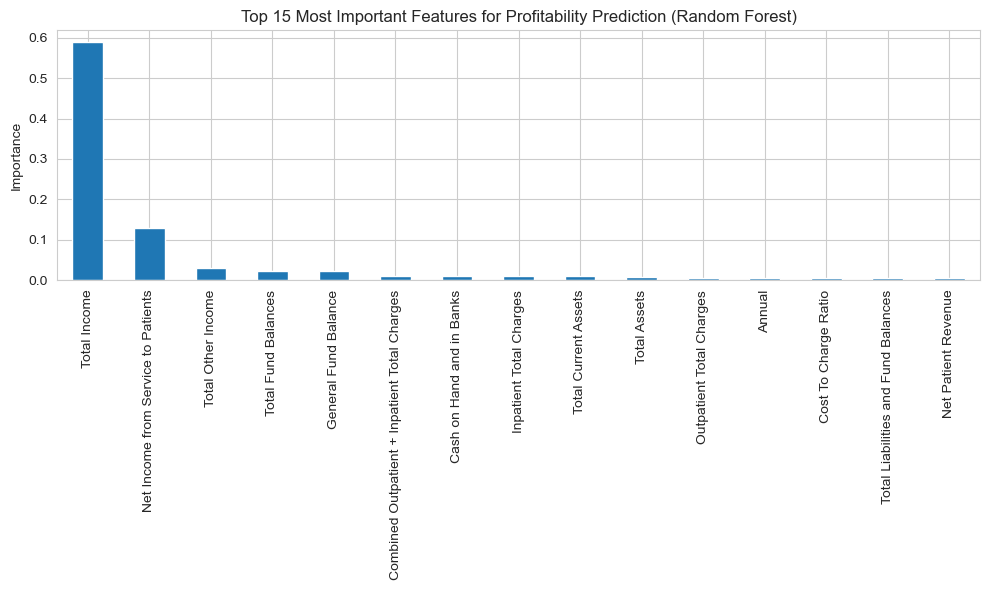

In [111]:
# --- Decision Tree and Random Forest for Profitability ---

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the modeling process is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the target variable column name.
    # This column ('Is_Profitable') is expected to have been created in a previous analysis step (like Cell 5).
    target_col = 'Is_Profitable'

    # Check if the required target column is present in the DataFrame.
    if target_col in df_hospital_integrated.columns:

        # Create a copy of the DataFrame to use for modeling.
        df_model_data = df_hospital_integrated.copy()

        # --- Define Features (X) ---
        # Define candidate feature columns by excluding identifiers, year, the original Net Income column,
        # the binary profitability status ('Is_Profitable' - which is the target), and other generated group/cluster columns.
        # These excluded columns are either identifiers, time variables, or directly related to the target definition.
        feature_cols_candidates = [col for col in df_model_data.columns if col not in [
            'Year', 'facility_id', 'Hospital Name', 'State Code', 'County',
            'Rural Versus Urban', 'Net Income', 'Is_Profitable',
            'Performance_Group_Quartile', 'Is_Top_Quartile', 'Cluster_Label' # Exclude clustering label too
            ]]

        # Filter the candidate features to keep only those that are numeric data types.
        # Decision Tree and Random Forest models can handle non-numeric data with proper encoding,
        # but here we focus on numeric features as per the previous analysis steps.
        feature_cols = [col for col in feature_cols_candidates if pd.api.types.is_numeric_dtype(df_model_data[col])]

        # Check if there are any valid feature columns identified for the model.
        if feature_cols:
            print(f"Using {len(feature_cols)} features for classification model: {feature_cols}")
            # Select the feature columns from the model data DataFrame.
            X = df_model_data[feature_cols]
            # Select the target variable column.
            y = df_model_data[target_col]

            # Ensure features are numeric, coercing errors to NaN, and filling any remaining NaNs.
            # Although imputation might have been done earlier, this is a safeguard for the features used in this specific model.
            # For simplicity here, we fill any remaining NaNs in features with the mean of the respective column.
            X = X.apply(lambda series: pd.to_numeric(series.astype(str), errors='coerce')).fillna(X.mean())

            # Drop rows where the target variable is NaN.
            # This should ideally have been handled when creating the target column in Cell 5, but this is a double-check.
            # Also drop rows where features might still be NaN after filling (shouldn't happen with mean fill, but good practice).
            initial_rows = X.shape[0]
            X = X.dropna()
            # Align the target variable 'y' with the potentially dropped rows in 'X' based on the index.
            y = y.loc[X.index] # Align y with the potentially dropped rows in X
            rows_after_drop = X.shape[0]

            # Print a message if any rows were dropped due to missing values in features or target.
            if initial_rows > rows_after_drop:
                print(f"Dropped {initial_rows - rows_after_drop} rows with missing values in features or target for modeling.")

            # Check if the feature matrix (X) and target vector (y) are not empty after handling missing values.
            if not X.empty and not y.empty:

                # --- Split data into training and testing sets ---
                print("\nSplitting data into training and testing sets (80/20 split)...")
                # Split the feature matrix (X) and target vector (y) into training and testing sets.
                # test_size=0.2 means 20% of the data will be used for testing, 80% for training.
                # random_state=42 ensures reproducibility of the split.
                # stratify=y ensures that the proportion of the target variable classes (0s and 1s)
                # is maintained in both training and testing sets, which is important for imbalanced datasets.
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution
                # Print the shapes of the resulting training and testing sets.
                print(f"Training set shape: {X_train.shape}")
                print(f"Testing set shape: {X_test.shape}")

                # --- Decision Tree Classifier ---
                print("\n--- Training Decision Tree Classifier for Profitability ---")
                # Initialize the Decision Tree Classifier model.
                # random_state=42 ensures reproducibility of the tree structure.
                dt_model = DecisionTreeClassifier(random_state=42)
                # Train the Decision Tree model using the training data.
                dt_model.fit(X_train, y_train)
                print("Decision Tree training complete.")

                # --- Evaluate Decision Tree ---
                # Make predictions on the training set.
                y_train_pred_dt = dt_model.predict(X_train)
                # Make predictions on the testing set.
                y_test_pred_dt = dt_model.predict(X_test)

                # Print evaluation metrics for the Decision Tree model.
                print("\n--- Decision Tree Evaluation (Profitability) ---")
                # Print the accuracy score for the training set.
                print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
                # Print the accuracy score for the testing set.
                print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))
                # Print the confusion matrix for the testing set.
                # This matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
                print("\nTesting Confusion Matrix:")
                print(confusion_matrix(y_test, y_test_pred_dt))
                # The classification report provides precision, recall, f1-score, and support for each class.
                # It is commented out here but can be uncommented for more detailed evaluation.
                # print("\nTesting Classification Report:")
                # print(classification_report(y_test, y_test_pred_dt))


                # --- Random Forest Classifier ---
                print("\n--- Training Random Forest Classifier for Profitability ---")
                # Initialize the Random Forest Classifier model.
                # n_estimators=100 specifies the number of trees in the forest.
                # random_state=42 ensures reproducibility.
                # n_jobs=-1 uses all available CPU cores for faster training.
                rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_estimators: number of trees, n_jobs=-1 uses all available cores
                # Train the Random Forest model using the training data.
                rf_model.fit(X_train, y_train)
                print("Random Forest training complete.")

                # --- Evaluate Random Forest ---
                # Make predictions on the training set.
                y_train_pred_rf = rf_model.predict(X_train)
                # Make predictions on the testing set.
                y_test_pred_rf = rf_model.predict(X_test)

                # Print evaluation metrics for the Random Forest model.
                print("\n--- Random Forest Evaluation (Profitability) ---")
                # Print the accuracy score for the training set.
                print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
                # Print the accuracy score for the testing set.
                print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
                # Print the confusion matrix for the testing set.
                print("\nTesting Confusion Matrix:")
                print(confusion_matrix(y_test, y_test_pred_rf))
                # The classification report for the testing set.
                # print("\nTesting Classification Report:")
                # print(classification_report(y_test, y_test_pred_rf))

                # --- Feature Importance from Random Forest ---
                # Random Forest models provide a measure of feature importance, indicating which features
                # were most useful in making predictions.
                print("\n--- Random Forest Feature Importance (Profitability) ---")
                # Get the feature importances from the trained Random Forest model.
                # Create a pandas Series mapping feature names to their importance scores.
                feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
                # Define how many of the top features to print and potentially plot.
                top_n_features = 15 # You can adjust this number
                # Sort the feature importances in descending order and print the top N.
                print(feature_importances.sort_values(ascending=False).head(top_n_features))

                # --- Optional: Plot feature importance ---
                # Create a bar plot to visualize the top N most important features.
                plt.figure(figsize=(10, 6))
                # Plot the top N feature importances.
                feature_importances.sort_values(ascending=False).head(top_n_features).plot(kind='bar')
                # Set the title of the plot.
                plt.title(f'Top {top_n_features} Most Important Features for Profitability Prediction (Random Forest)')
                # Set the y-axis label.
                plt.ylabel('Importance')
                # Adjust the layout to prevent labels from overlapping.
                plt.tight_layout()
                # Display the plot.
                plt.show()


            # If the data is empty after handling missing values, print a message.
            else:
                print("Skipping Decision Tree/Random Forest for Profitability: Data is empty after handling missing values.")


        # If no valid numeric features were found for modeling, print a message.
        else:
            print("Skipping Decision Tree/Random Forest for Profitability: No valid numeric features found for modeling.")

    # If the target column ('Is_Profitable') is not found in the DataFrame, print a message.
    else:
        print(f"Skipping Decision Tree/Random Forest for Profitability: Target column ('{target_col}') not found in the DataFrame.")

# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Decision Tree/Random Forest for Profitability: DataFrame not loaded or is empty.")


Using 48 features for classification model: ['Total Revenue', 'Total_Staffing_FTE', 'Number of Beds', 'Cost of Charity Care', 'Net Revenue from Medicaid', 'Total Bad Debt Expense', 'Other Assets', 'Cost of Uncompensated Care', 'Total Unreimbursed and Uncompensated Care', 'Cost To Charge Ratio', 'Prepaid Expenses', 'Other Current Liabilities', 'Total Other Assets', 'Total Long Term Liabilities', 'Buildings', 'Salaries, Wages, and Fees Payable', 'Inventory', 'Major Movable Equipment', 'Outpatient Revenue', 'Cash on Hand and in Banks', 'Outpatient Total Charges', 'Accounts Payable', 'Accounts Receivable', 'Total Fixed Assets', "Contractual Allowance and Discounts on Patients' Accounts", 'Total Current Liabilities', 'Total Liabilities', 'Total Current Assets', 'General Fund Balance', 'Total Fund Balances', 'Total Liabilities and Fund Balances', 'Total Assets', 'Total Other Income', 'Inpatient Revenue', 'Total Patient Revenue', 'Net Patient Revenue', 'Depreciation Cost', 'Total Income', 'Le

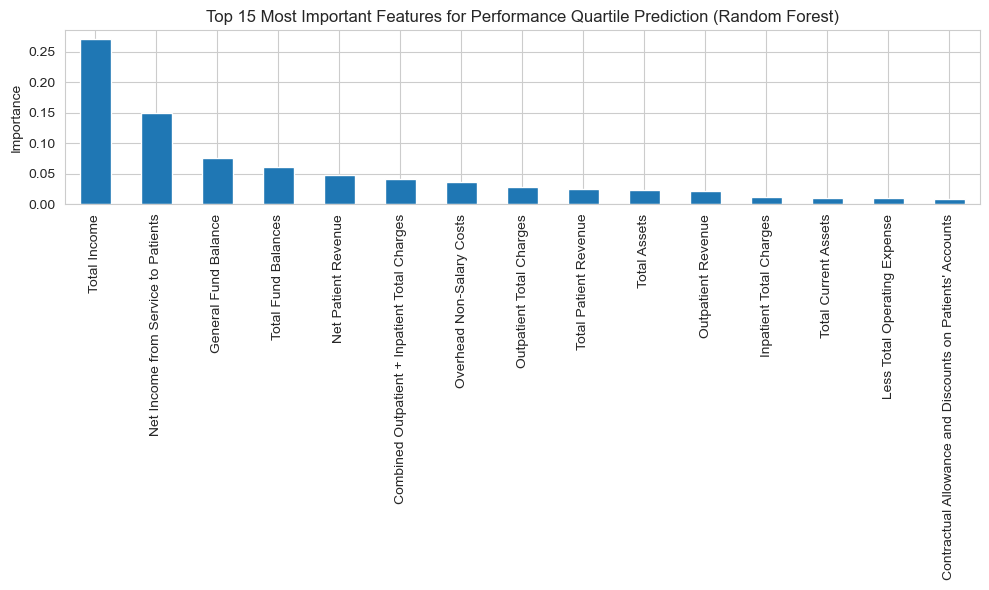

In [113]:
# --- Decision Tree and Random Forest for Performance Quartile ---

# Import necessary libraries from scikit-learn for machine learning.
# train_test_split for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# DecisionTreeClassifier for building a Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
# RandomForestClassifier for building a Random Forest model (an ensemble of decision trees).
from sklearn.ensemble import RandomForestClassifier
# accuracy_score, confusion_matrix, classification_report for evaluating model performance.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Import pandas for data manipulation.
import pandas as pd
# Import numpy for numerical operations.
import numpy as np
# Import matplotlib.pyplot for plotting.
import matplotlib.pyplot as plt
# Import seaborn for enhanced data visualization.
import seaborn as sns

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the modeling process is only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the target variable column name for this classification task.
    # This column ('Is_Top_Quartile') indicates whether a hospital is in the top performance quartile (1) or not (0).
    # It is expected to have been created in a previous analysis step (like Cell 10).
    target_col_name = 'Is_Top_Quartile'
    # Define the column used for the initial performance quartile grouping (e.g., 'Top Quartile', 'Bottom Quartile', 'Other').
    # This column is used here to filter the data for modeling. It should have been created in Cell 6.
    quartile_group_col = 'Performance_Group_Quartile'


    # --- Ensure the target and grouping columns exist ---
    # Check if the binary target column ('Is_Top_Quartile') is present in the DataFrame.
    if target_col_name not in df_hospital_integrated.columns:
        # If the target column is missing, print an error message and skip the analysis.
        # Suggest running the cell where this column is expected to be created (Cell 10).
        print(f"Skipping Decision Tree/Random Forest for Performance Quartile: Target column ('{target_col_name}') not found in the DataFrame.")
        print("Please ensure Analysis Cell 10 was run successfully to create this column.")
    # Check if the performance grouping column ('Performance_Group_Quartile') is present.
    elif quartile_group_col not in df_hospital_integrated.columns:
         # If the grouping column is missing, print an error message and skip the analysis.
         # Suggest running the cell where this column is expected to be created (Cell 6).
         print(f"Skipping Decision Tree/Random Forest for Performance Quartile: Grouping column ('{quartile_group_col}') not found in the DataFrame.")
         print("Please ensure Analysis Cell 6 was run successfully to create this column.")
    else:
        # If both required columns are present, proceed with the analysis.
        # Assign the target column name to a variable 'target_col' for consistency in the rest of the code block.
        target_col = target_col_name # Assign the column name to target_col for consistency

        # --- Filter data to include only Top and Bottom Quartile groups ---
        # This filtering step is crucial because this model is designed to predict the distinction
        # specifically between hospitals in the top and bottom performance quartiles, excluding the 'Other' group.
        # It uses the 'Performance_Group_Quartile' column which should exist from Cell 6.
        # The target_col ('Is_Top_Quartile') should already exist in df_hospital_integrated from Cell 10
        # and will be present in this filtered DataFrame.
        df_model_data = df_hospital_integrated[df_hospital_integrated[quartile_group_col].isin(['Top Quartile', 'Bottom Quartile'])].copy()


        # Check if the filtered DataFrame for modeling is not empty.
        # If it's empty, it means there are no hospitals classified into the Top or Bottom Quartiles
        # in the loaded data, or the filtering logic is incorrect.
        if not df_model_data.empty:
            # The binary target variable 'Is_Top_Quartile' should already be in df_model_data
            # because it was in df_hospital_integrated before the filter.
            # We now define the feature matrix (X) and target vector (y) using this filtered data.

            # --- Define Features (X) ---
            # Define candidate feature columns by excluding identifiers, year, the original Net Income column,
            # the initial profitability status ('Is_Profitable'), and the performance group/target columns.
            # These excluded columns are either identifiers, time variables, or directly related to the target definition
            # for *this specific* model (predicting Top vs Bottom Quartile).
            feature_cols_candidates = [col for col in df_model_data.columns if col not in [
                'Year', 'facility_id', 'Hospital Name', 'State Code', 'County',
                'Rural Versus Urban', 'Net Income', 'Is_Profitable',
                'Performance_Group_Quartile', 'Is_Top_Quartile', 'Cluster_Label' # Exclude clustering label too
                ]]

            # Filter the candidate features to keep only those that are numeric data types.
            # Decision Tree and Random Forest models can handle non-numeric data with proper encoding,
            # but here we focus on numeric features as per the previous analysis steps.
            feature_cols = [col for col in feature_cols_candidates if pd.api.types.is_numeric_dtype(df_model_data[col])]

            # Check if there are any valid feature columns identified for the model.
            if feature_cols:
                print(f"Using {len(feature_cols)} features for classification model: {feature_cols}")
                # Select the feature columns from the filtered model data DataFrame.
                X = df_model_data[feature_cols] # Use the filtered data for features
                # Select the binary target variable column from the filtered data.
                y = df_model_data[target_col] # Use the target from filtered data

                # Ensure features are numeric, coercing errors to NaN, and filling any remaining NaNs.
                # Although imputation might have been done earlier, this is a safeguard for the features used in this specific model.
                # For simplicity here, we fill any remaining NaNs in features with the mean of the respective column.
                X = X.apply(lambda series: pd.to_numeric(series.astype(str), errors='coerce')).fillna(X.mean())

                # Drop rows where the target variable is NaN.
                # This should not happen if the 'Is_Top_Quartile' column was created correctly based on the filtered data,
                # but this is a double-check for robustness.
                # Also drop rows where features might still be NaN after filling (shouldn't happen with mean fill, but good practice).
                initial_rows = X.shape[0]
                X = X.dropna()
                # Align the target variable 'y' with the potentially dropped rows in 'X' based on the index.
                y = y.loc[X.index] # Align y with the potentially dropped rows in X
                rows_after_drop = X.shape[0]

                # Print a message if any rows were dropped due to missing values in features or target.
                if initial_rows > rows_after_drop:
                    print(f"Dropped {initial_rows - rows_after_drop} rows with missing values in features or target for modeling.")

                # Check if the feature matrix (X) and target vector (y) are not empty after handling missing values.
                # This is necessary before attempting to split the data and train models.
                if not X.empty and not y.empty:

                    # --- Split data into training and testing sets ---
                    print("\nSplitting data into training and testing sets (80/20 split)...")
                    # Split the feature matrix (X) and target vector (y) into training and testing sets.
                    # test_size=0.2 means 20% of the data will be used for testing, 80% for training.
                    # random_state=42 ensures reproducibility of the split.
                    # stratify=y ensures that the proportion of the target variable classes (Top vs Bottom Quartile)
                    # is maintained in both training and testing sets, which is important for imbalanced datasets.
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution
                    # Print the shapes of the resulting training and testing sets.
                    print(f"Training set shape: {X_train.shape}")
                    print(f"Testing set shape: {X_test.shape}")

                    # --- Decision Tree Classifier ---
                    print("\n--- Training Decision Tree Classifier for Performance Quartile ---")
                    # Initialize the Decision Tree Classifier model.
                    # random_state=42 ensures reproducibility of the tree structure.
                    # max_depth and min_samples_leaf are added as example parameters to help prevent overfitting.
                    # Adjust these parameters based on model performance and complexity needs.
                    dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5) # Example parameters, adjust as needed
                    # Train the Decision Tree model using the training data.
                    dt_model.fit(X_train, y_train)
                    print("Decision Tree training complete.")

                    # --- Evaluate Decision Tree ---
                    # Make predictions on the training set.
                    y_train_pred_dt = dt_model.predict(X_train)
                    # Make predictions on the testing set.
                    y_test_pred_dt = dt_model.predict(X_test)

                    # Print evaluation metrics for the Decision Tree model.
                    print("\n--- Decision Tree Evaluation (Performance Quartile) ---")
                    # Print the accuracy score for the training set.
                    print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
                    # Print the accuracy score for the testing set.
                    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))
                    # Print the confusion matrix for the testing set.
                    # This matrix shows the counts of true positive, true negative, false positive, and false negative predictions.
                    print("\nTesting Confusion Matrix:")
                    print(confusion_matrix(y_test, y_test_pred_dt))
                    # The classification report provides precision, recall, f1-score, and support for each class.
                    # It is commented out here but can be uncommented for more detailed evaluation.
                    # print("\nTesting Classification Report:")
                    # print(classification_report(y_test, y_test_pred_dt))


                    # --- Random Forest Classifier ---
                    print("\n--- Training Random Forest Classifier for Performance Quartile ---")
                    # Initialize the Random Forest Classifier model.
                    # n_estimators=100 specifies the number of trees in the forest.
                    # random_state=42 ensures reproducibility.
                    # n_jobs=-1 uses all available CPU cores for faster training.
                    # max_depth and min_samples_leaf are also applied here to individual trees in the forest.
                    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_leaf=5) # Example parameters, adjust as needed
                    # Train the Random Forest model using the training data.
                    rf_model.fit(X_train, y_train)
                    print("Random Forest training complete.")

                    # --- Evaluate Random Forest ---
                    # Make predictions on the training set.
                    y_train_pred_rf = rf_model.predict(X_train)
                    # Make predictions on the testing set.
                    y_test_pred_rf = rf_model.predict(X_test)

                    # Print evaluation metrics for the Random Forest model.
                    print("\n--- Random Forest Evaluation (Performance Quartile) ---")
                    # Print the accuracy score for the training set.
                    print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
                    # Print the accuracy score for the testing set.
                    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))
                    # Print the confusion matrix for the testing set.
                    print("\nTesting Confusion Matrix:")
                    print(confusion_matrix(y_test, y_test_pred_rf))
                    # The classification report for the testing set.
                    # print("\nTesting Classification Report:")
                    # print(classification_report(y_test, y_test_pred_rf))

                    # --- Feature Importance from Random Forest ---
                    # Random Forest models provide a measure of feature importance, indicating which features
                    # were most useful in making predictions. This can provide insights into the characteristics
                    # that differentiate top-performing hospitals from bottom-performing ones.
                    print("\n--- Random Forest Feature Importance (Performance Quartile) ---")
                    # Get the feature importances from the trained Random Forest model.
                    # Create a pandas Series mapping feature names to their importance scores.
                    feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
                    # Define how many of the top features to print and potentially plot.
                    top_n_features = 15 # You can adjust this number
                    # Sort the feature importances in descending order and print the top N.
                    print(feature_importances.sort_values(ascending=False).head(top_n_features))

                    # --- Optional: Plot feature importance ---
                    # Create a bar plot to visualize the top N most important features.
                    plt.figure(figsize=(10, 6))
                    # Plot the top N feature importances.
                    feature_importances.sort_values(ascending=False).head(top_n_features).plot(kind='bar')
                    # Set the title of the plot.
                    plt.title(f'Top {top_n_features} Most Important Features for Performance Quartile Prediction (Random Forest)')
                    # Set the y-axis label.
                    plt.ylabel('Importance')
                    # Adjust the layout to prevent labels from overlapping.
                    plt.tight_layout()
                    # Display the plot.
                    plt.show()


                # If the data is empty after handling missing values, print a message.
                else:
                    print("Skipping Decision Tree/Random Forest for Quartile: Data is empty after handling missing values.")

            # If no valid numeric features were found for modeling, print a message.
            else:
                print("Skipping Decision Tree/Random Forest for Quartile: No valid numeric features found for modeling.")


        # If the filtered DataFrame for Top/Bottom Quartile is empty based on the grouping column, print a message.
        else:
            print("Skipping Decision Tree/Random Forest for Quartile: Filtered DataFrame for Top/Bottom Quartile is empty.")


    # If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Decision Tree/Random Forest for Quartile: DataFrame not loaded or is empty.")


--- Analysis Cell 6: Comparing Financial Metrics with Boxplots (Top vs Bottom Quartile) (Objective 2) ---
Calculating average Net Income for quartile analysis.

5-Year Average Net Income Quartiles:
  Q1 (25th percentile): -126,583.15
  Q3 (75th percentile): 11,927,607.60

Number of facilities in Top Quartile: 1231
Number of facilities in Bottom Quartile: 1231
Updated 'Performance_Group_Quartile' column in df_hospital_integrated.

Generating boxplots for metrics (normalized by Number of Beds where applicable):


C:\Users\yadla\AppData\Local\Temp\ipykernel_5544\960557908.py:202: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout() # Adjust layout to prevent overlap


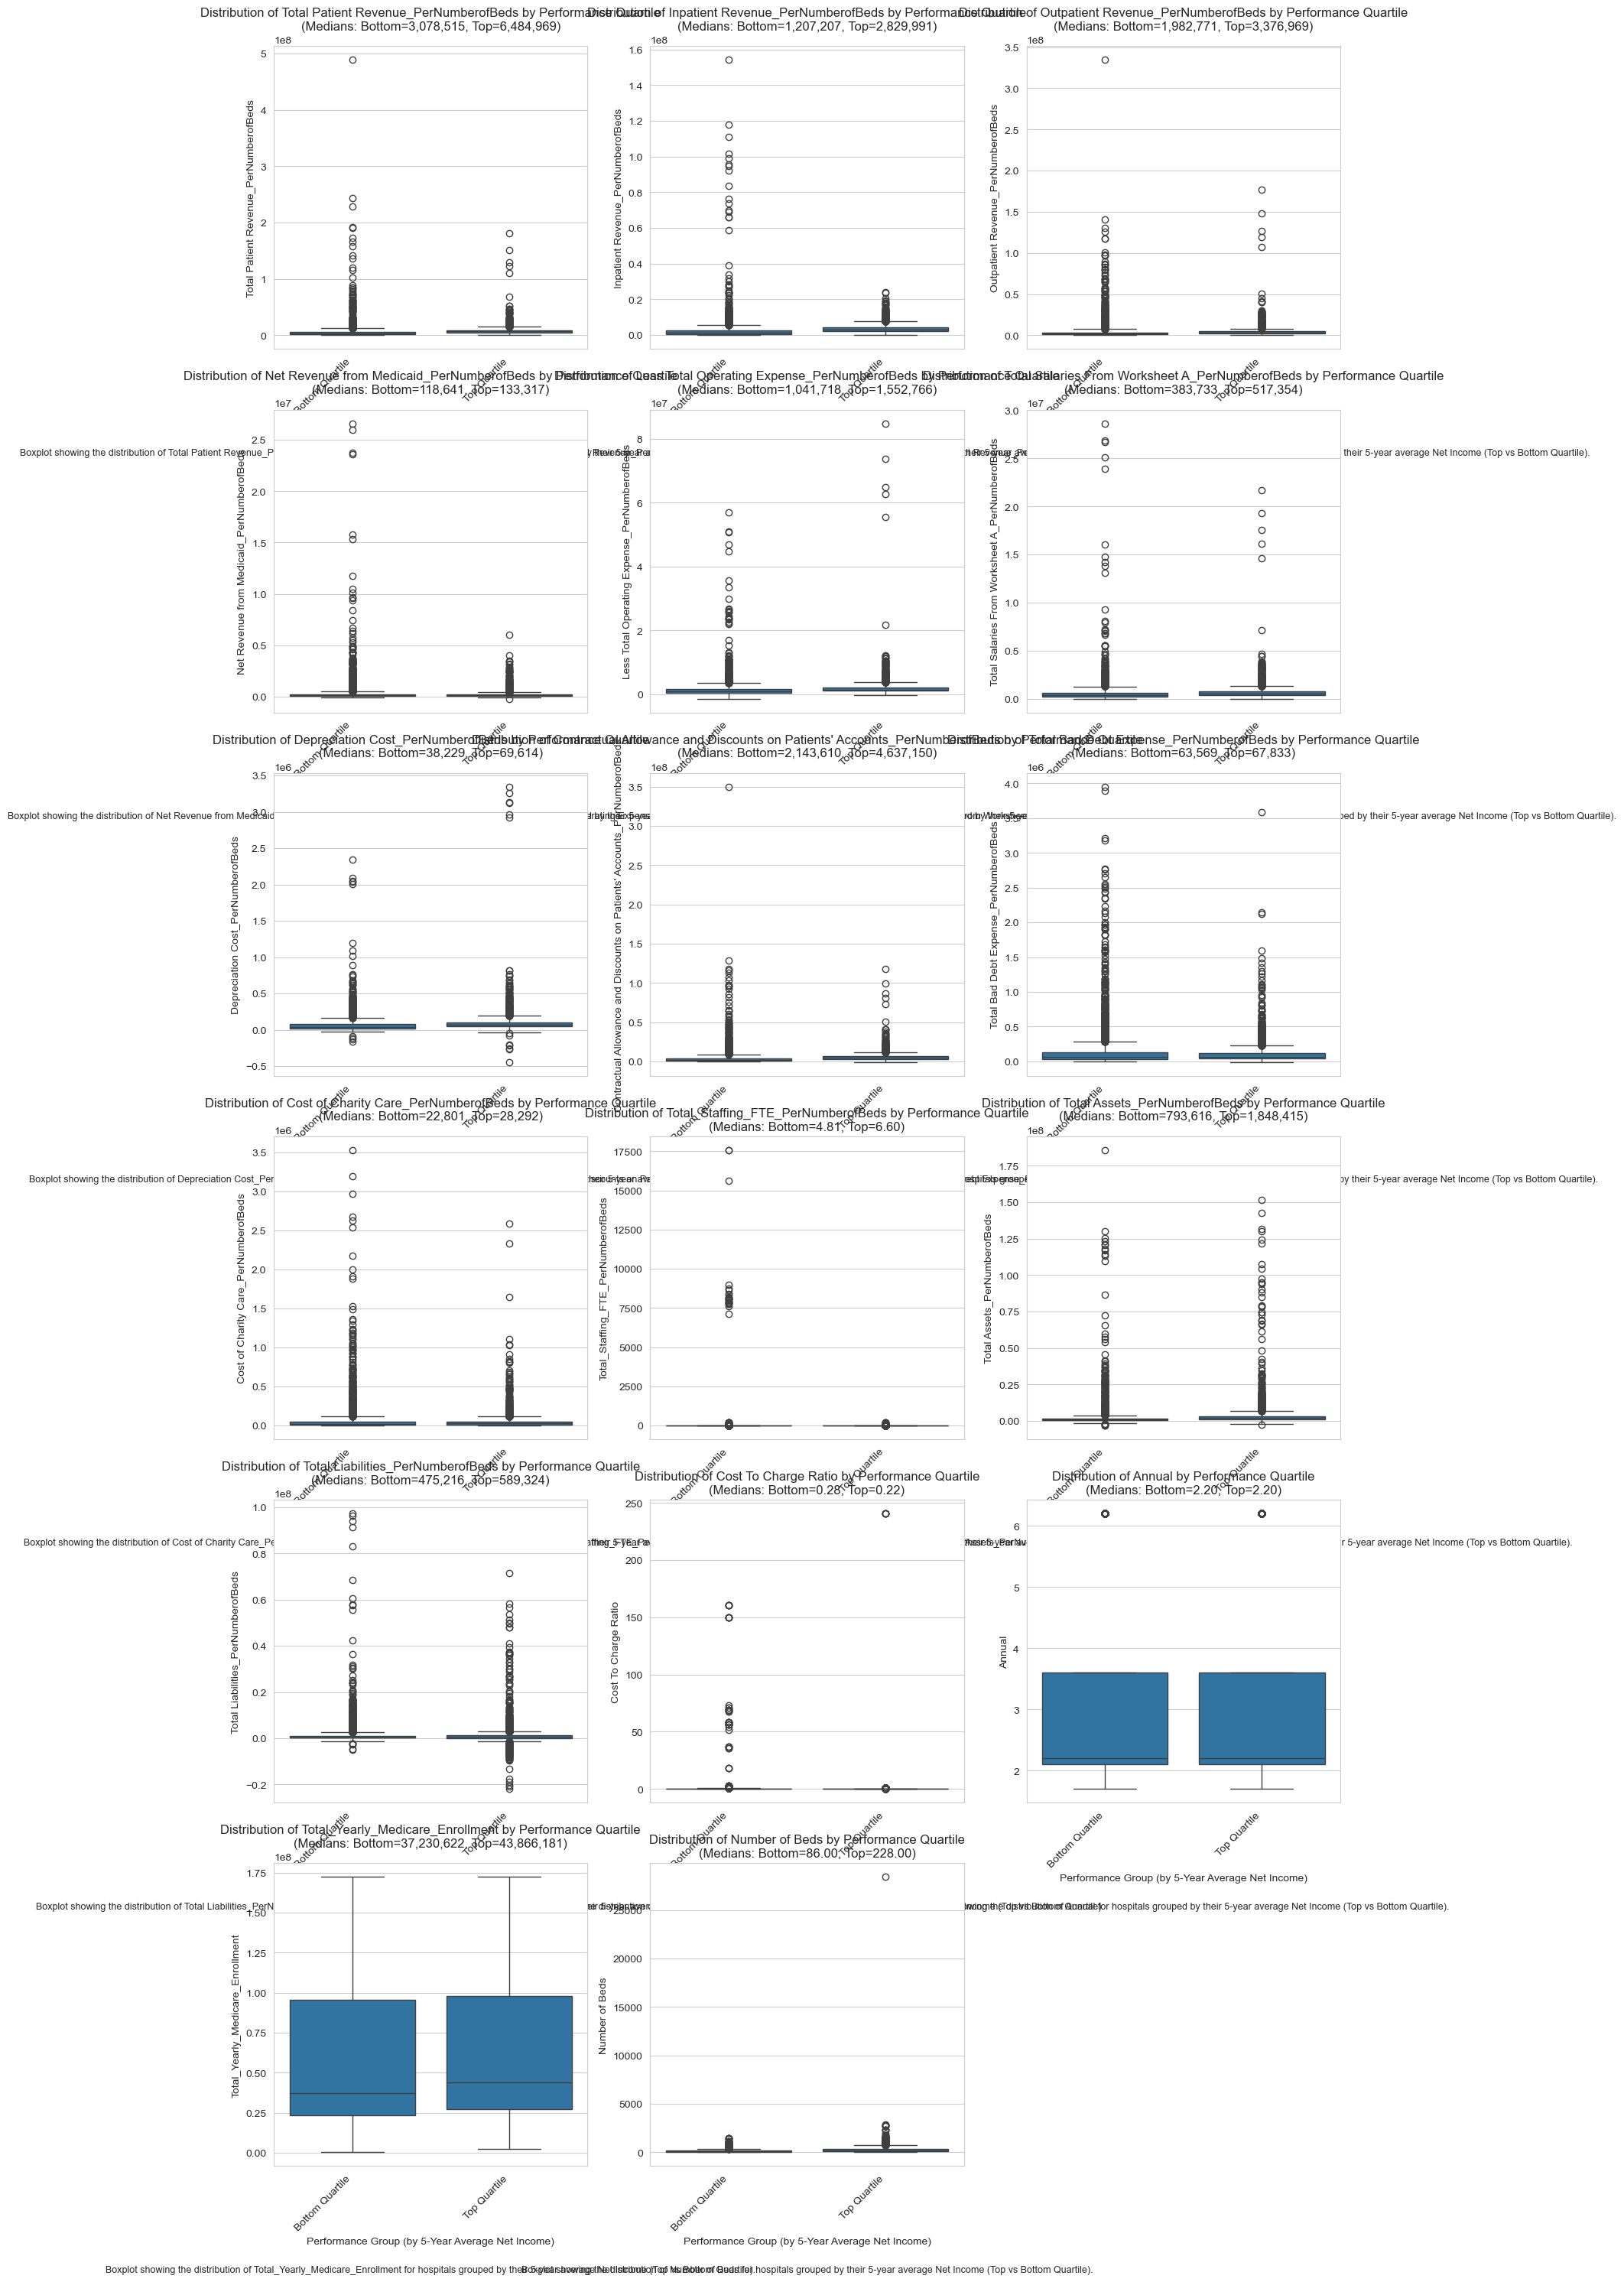

In [115]:
# --- Compare Financial Metrics with Boxplots (Top vs Bottom Quartile) ---
# This cell performs analysis and plotting to compare various financial and operational
# metrics between hospitals in the top and bottom performance quartiles based on Net Income.
# It also performs local normalization for plotting purposes.

print("--- Analysis Cell 6: Comparing Financial Metrics with Boxplots (Top vs Bottom Quartile) (Objective 2) ---")

# Check if the DataFrame 'df_hospital_integrated' exists in the local scope and is not empty.
# This ensures that the analysis and plotting are only performed if the data was successfully loaded.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty:

    # Define the performance metric that will be used to calculate the quartiles.
    # This is the basis for grouping hospitals into top, bottom, and other performance groups.
    net_income_col_for_quartile = 'Net Income'
    # Define the column used for normalization in the boxplots.
    normalization_col = 'Number of Beds' # Normalization column

    # Define the required columns for performing the quartile analysis and subsequent normalization.
    # 'Year' and 'facility_id' are needed for grouping, the net income column for calculating the average,
    # and the normalization column ('Number of Beds') for normalization.
    required_cols_quartile = ['Year', 'facility_id', net_income_col_for_quartile, normalization_col]
    # Check if all required columns are present in the DataFrame.
    if all(col in df_hospital_integrated.columns for col in required_cols_quartile):

        # Create a copy of the DataFrame to avoid modifying the original during quartile calculation.
        df_quartile = df_hospital_integrated.copy()

        # Ensure the required columns for quartile analysis are numeric types, coercing errors to NaN.
        for col in [net_income_col_for_quartile, normalization_col]:
             df_quartile[col] = pd.to_numeric(df_quartile[col].astype(str), errors='coerce')

        # Drop rows where essential columns for quartile analysis are still NaN after coercion.
        # Missing values in these columns would prevent accurate grouping and normalization.
        df_quartile = df_quartile.dropna(subset=[net_income_col_for_quartile, 'facility_id', 'Year', normalization_col])

        # Check if the DataFrame is still not empty after dropping NaNs.
        if not df_quartile.empty:
            print(f"Calculating average {net_income_col_for_quartile} for quartile analysis.")

            # Calculate the 5-year average Net Income for each unique facility.
            # This average is used to determine the performance quartile for each hospital.
            five_year_avg_income = df_quartile.groupby('facility_id')[net_income_col_for_quartile].mean()

            # Calculate the 25th (Q1) and 75th (Q3) percentiles of the 5-year average Net Income.
            # These values define the thresholds for the bottom and top quartiles.
            Q1 = five_year_avg_income.quantile(0.25)
            Q3 = five_year_avg_income.quantile(0.75)

            # Print the calculated quartile values.
            print(f"\n5-Year Average {net_income_col_for_quartile} Quartiles:")
            print(f"  Q1 (25th percentile): {Q1:,.2f}")
            print(f"  Q3 (75th percentile): {Q3:,.2f}")

            # Identify the facility IDs that fall into the top quartile (average income >= Q3)
            # and the bottom quartile (average income <= Q1).
            top_quartile_ids = five_year_avg_income[five_year_avg_income >= Q3].index.tolist()
            bottom_quartile_ids = five_year_avg_income[five_year_avg_income <= Q1].index.tolist()

            # Print the number of facilities identified in each quartile.
            print(f"\nNumber of facilities in Top Quartile: {len(top_quartile_ids)}")
            print(f"Number of facilities in Bottom Quartile: {len(bottom_quartile_ids)}")


            # --- Create a column to flag these groups in the original dataframe for plotting ---
            # This column will be used to easily filter and group data for the boxplots.
            # Define the name for the new performance group column.
            performance_group_col = 'Performance_Group_Quartile'
            # Check if the 'Performance_Group_Quartile' column already exists in the main DataFrame.
            if performance_group_col in df_hospital_integrated.columns:
                 # If it exists, reset all its values to 'Other' before assigning new groups.
                 df_hospital_integrated[performance_group_col] = 'Other'
            else:
                 # If it doesn't exist, create it and initialize all values to 'Other'.
                 df_hospital_integrated[performance_group_col] = 'Other'

            # Assign 'Top Quartile' label to rows where the facility_id is in the top_quartile_ids list.
            df_hospital_integrated.loc[df_hospital_integrated['facility_id'].isin(top_quartile_ids), performance_group_col] = 'Top Quartile'
            # Assign 'Bottom Quartile' label to rows where the facility_id is in the bottom_quartile_ids list.
            df_hospital_integrated.loc[df_hospital_integrated['facility_id'].isin(bottom_quartile_ids), performance_group_col] = 'Bottom Quartile'

            # Print confirmation that the column has been updated.
            print("Updated 'Performance_Group_Quartile' column in df_hospital_integrated.")


            # Define the list of financial, operational, and external metrics to compare between quartiles.
            metrics_to_normalize_and_compare = [
                'Total Patient Revenue', 'Inpatient Revenue', 'Outpatient Revenue', 'Net Revenue from Medicaid',
                'Less Total Operating Expense', 'Total Salaries From Worksheet A', 'Depreciation Cost',
                'Contractual Allowance and Discounts on Patients\' Accounts', 'Total Bad Debt Expense',
                'Cost of Charity Care', 'Total_Staffing_FTE', 'Total Assets', 'Total Liabilities',
                # Ratios and external factors are typically not normalized by beds or days/visits,
                # but are included in the list to be plotted in their original form.
                'Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment',
                normalization_col # Include the normalization column itself as a metric to compare
            ]

            # Filter the list of metrics to include only those actually present in the DataFrame and are numeric.
            # Only numeric columns can be used in boxplots.
            present_numeric_metrics_original = [col for col in metrics_to_normalize_and_compare if col in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]

            # Check if there are any numeric metrics to plot.
            if present_numeric_metrics_original:
                print(f"\nGenerating boxplots for metrics (normalized by {normalization_col} where applicable):")

                # Filter the DataFrame to include only the rows belonging to the 'Top Quartile' or 'Bottom Quartile' groups.
                # Create a copy to avoid modifying the main DataFrame during plotting data preparation.
                df_plot = df_hospital_integrated[df_hospital_integrated[performance_group_col].isin(['Top Quartile', 'Bottom Quartile'])].copy()

                # Ensure the normalization column is numeric and handle potential zeros or NaNs.
                df_plot[normalization_col] = pd.to_numeric(df_plot[normalization_col], errors='coerce')
                # Drop rows where the normalization column is NaN.
                df_plot = df_plot.dropna(subset=[normalization_col])
                # Replace any zero values in the normalization column with NaN, as division by zero is undefined.
                df_plot[normalization_col] = df_plot[normalization_col].replace(0, np.nan)
                # Drop rows where the normalization column became NaN after replacing zeros.
                df_plot = df_plot.dropna(subset=[normalization_col])

                # Check if the filtered and cleaned DataFrame for plotting is not empty.
                if not df_plot.empty:
                    # --- Normalize the relevant columns ---
                    # Create a list to store the names of the metrics that will actually be plotted (including normalized ones).
                    normalized_metrics_to_plot = []
                    # Iterate through the original list of present numeric metrics.
                    for metric in present_numeric_metrics_original:
                        # Determine whether to normalize the current metric.
                        # We normalize if it's not a ratio, an external factor, or the normalization column itself.
                        if metric not in ['Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment', normalization_col]:
                             # Create a descriptive name for the normalized column.
                             normalized_col_name = f'{metric}_Per{normalization_col.replace(" ", "")}' # Create a descriptive name
                             # Calculate the normalized value by dividing the metric by the normalization column.
                             df_plot[normalized_col_name] = df_plot[metric] / df_plot[normalization_col]
                             # Add the name of the new normalized column to the list of metrics to plot.
                             normalized_metrics_to_plot.append(normalized_col_name)
                        else:
                             # If the metric is not normalized, add its original name to the list of metrics to plot.
                             normalized_metrics_to_plot.append(metric)

                    # --- Plotting the distributions with Boxplots ---
                    # Determine the number of boxplots to generate.
                    n_plots = len(normalized_metrics_to_plot)
                    # Define the number of columns for the subplot grid.
                    n_cols = 3 # Increased number of columns for subplots
                    # Calculate the number of rows needed for the subplot grid.
                    n_rows = (n_plots + n_cols - 1) // n_cols # Calculate number of rows needed

                    # Create a figure and a grid of subplots.
                    # Adjust the figure size based on the number of rows and columns for better visualization.
                    plt.figure(figsize=(18, n_rows * 6)) # Adjusted figure size

                    # Loop through each metric that is designated for plotting.
                    for i, metric in enumerate(normalized_metrics_to_plot):
                        # Get the current axes object for the subplot.
                        ax = plt.subplot(n_rows, n_cols, i + 1) # Get the current axes

                        # Create a boxplot using seaborn.
                        # x-axis represents the performance group (Top/Bottom Quartile).
                        # y-axis represents the values of the current metric.
                        # data is the filtered DataFrame containing only the quartile groups.
                        # ax specifies which subplot to draw on.
                        sns.boxplot(x=performance_group_col, y=metric, data=df_plot, ax=ax)
                        # Set the x-axis label.
                        plt.xlabel('Performance Group (by 5-Year Average Net Income)')
                        # Set the y-axis label to the name of the metric.
                        plt.ylabel(metric)
                        # Rotate the x-axis labels for better readability if they are long.
                        plt.xticks(rotation=45, ha='right') # Rotate labels for readability

                        # --- Add Median Values to the Plot Title ---
                        # Calculate the median value of the current metric for the 'Bottom Quartile' group.
                        median_bottom_quartile = df_plot[df_plot[performance_group_col] == 'Bottom Quartile'][metric].median()
                        # Calculate the median value of the current metric for the 'Top Quartile' group.
                        median_top_quartile = df_plot[df_plot[performance_group_col] == 'Top Quartile'][metric].median()

                        # Format the median values for display in the title.
                        # Use integer formatting for large numbers (abs > 1000) and 2 decimal places otherwise.
                        if abs(median_bottom_quartile) > 1000 or abs(median_top_quartile) > 1000:
                             median_text_bottom = f'{median_bottom_quartile:,.0f}' # Format as integer with commas
                             median_text_top = f'{median_top_quartile:,.0f}'
                        else:
                             median_text_bottom = f'{median_bottom_quartile:.2f}' # Format with 2 decimal places
                             median_text_top = f'{median_top_quartile:.2f}'

                        # Construct the title string including the metric name and the calculated medians for each group.
                        plot_title = f'Distribution of {metric} by Performance Quartile\n(Medians: Bottom={median_text_bottom}, Top={median_text_top})'
                        # Set the title of the current subplot.
                        ax.set_title(plot_title)
                        # --- End of Median in Title ---


                        # --- Add a tooltip explanation ---
                        # Define a base tooltip explanation for the boxplot.
                        tooltip = f"Boxplot showing the distribution of {metric}{' (normalized by ' + normalization_col + ')' if f'_Per{normalization_col.replace(" ", "")}' in metric else ''} for hospitals grouped by their 5-year average Net Income (Top vs Bottom Quartile)."

                        # Add the tooltip text below the current subplot.
                        # transform=ax.transAxes positions the text relative to the axes of the current subplot.
                        # -0.35 adjusts the vertical position to be below the x-axis labels.
                        plt.text(0.5, -0.35, tooltip, size=9, ha="center",
                                 transform=ax.transAxes)


                    # Adjust the layout of the subplots to prevent titles, labels, or plots from overlapping.
                    plt.tight_layout() # Adjust layout to prevent overlap
                    # Display the generated plots.
                    plt.show()

                # If the DataFrame is empty after filtering for quartile groups and handling NaNs for normalization, print a message.
                else:
                    print("DataFrame is empty after filtering for Top/Bottom Quartile groups and dropping NaNs for normalization. Cannot generate boxplots.")

            # If none of the specified metrics are present and numeric, print a message listing the missing/non-numeric ones.
            else:
                missing_or_non_numeric = [col for col in metrics_to_normalize_and_compare if col not in df_hospital_integrated.columns or not pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]
                print(f"Skipping Boxplot Analysis: None of the specified metrics are present and numeric in the DataFrame. Missing or non-numeric: {missing_or_non_numeric}")

        # If the DataFrame is empty after dropping NaNs for the required quartile analysis columns, print a message.
        else:
            print("DataFrame is empty after dropping NaNs for quartile analysis. Cannot perform quartile grouping.")


    # If required columns for quartile calculation are missing from the DataFrame, print a message listing the missing columns.
    else:
        missing = [col for col in required_cols_quartile if col not in df_hospital_integrated.columns]
        print(f"Skipping Boxplot Analysis: Required columns for quartile calculation missing - {missing}")


# If the initial DataFrame was not loaded or is empty, print a message indicating this and skipping the analysis.
else:
    print("Skipping Boxplot Analysis: DataFrame not loaded or is empty.")


In [117]:
# --- T-tests (Top vs Bottom Quartile) ---
# This cell performs independent samples t-tests to compare the means of various financial,
# operational, and external metrics between hospitals in the top and bottom performance
# quartiles (based on 5-year average Net Income).
# It also performs local normalization by 'Number of Beds' for relevant metrics before testing.

# Check if the DataFrame 'df_hospital_integrated' exists, is not empty, and contains the 'Performance_Group_Quartile' column.
# The 'Performance_Group_Quartile' column is necessary to group the data for the t-tests.
# This column is expected to have been created in Analysis Cell 6.
if 'df_hospital_integrated' in locals() and not df_hospital_integrated.empty and 'Performance_Group_Quartile' in df_hospital_integrated.columns:

    # Define the list of financial, operational, and external metrics to compare using t-tests.
    # This list is the same as the one used for the boxplots, ensuring consistency in the analysis.
    metrics_to_normalize_and_compare = [
        'Total Patient Revenue', 'Inpatient Revenue', 'Outpatient Revenue', 'Net Revenue from Medicaid',
        'Less Total Operating Expense', 'Total Salaries From Worksheet A', 'Depreciation Cost',
        'Contractual Allowance and Discounts on Patients\' Accounts', 'Total Bad Debt Expense',
        'Cost of Charity Care', 'Total_Staffing_FTE', 'Total Assets', 'Total Liabilities',
        # Ratios and external factors are typically not normalized by beds or days/visits,
        # but are included in the list to be tested in their original form.
        'Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment',
        'Number of Beds' # Include the normalization column itself in the list of metrics to potentially test
    ]

    # Filter the list of metrics to include only those actually present in the DataFrame and are numeric.
    # Only numeric columns can be used in t-tests.
    present_numeric_metrics_original = [col for col in metrics_to_normalize_and_compare if col in df_hospital_integrated.columns and pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]

    # Define the column name to be used for normalization before performing t-tests for relevant metrics.
    normalization_col = 'Number of Beds' # Normalization column

    # Check if there are any numeric metrics to test.
    # The presence of the normalization column is checked later within the loop for each metric.
    if present_numeric_metrics_original:
        print(f"Performing t-tests for metrics (normalized by {normalization_col} where applicable):")

        # Filter the main DataFrame to create separate DataFrames for the 'Top Quartile' and 'Bottom Quartile' groups.
        # Create copies to avoid modifying the original DataFrame.
        top_group_data = df_hospital_integrated[df_hospital_integrated['Performance_Group_Quartile'] == 'Top Quartile'].copy()
        bottom_group_data = df_hospital_integrated[df_hospital_integrated['Performance_Group_Quartile'] == 'Bottom Quartile'].copy()

        # Ensure the normalization column ('Number of Beds') is numeric and handle potential zeros or NaNs in both group DataFrames.
        # This step is necessary before performing normalization or using the column directly in a test.
        for df_group in [top_group_data, bottom_group_data]:
             if normalization_col in df_group.columns:
                 df_group[normalization_col] = pd.to_numeric(df_group[normalization_col], errors='coerce')
                 # Replace any zero values in the normalization column with NaN, as division by zero is undefined.
                 df_group[normalization_col] = df_group[normalization_col].replace(0, np.nan)

        # Check if both the top and bottom group DataFrames are not empty after filtering and initial NaN handling.
        # T-tests require data from both groups.
        if not top_group_data.empty and not bottom_group_data.empty:

            # Initialize a dictionary to store the results of the t-tests.
            ttest_results = {}

            # Loop through each of the identified present numeric metrics.
            for metric in present_numeric_metrics_original:
                 # Determine the column name that will be used for the t-test for the current metric.
                 # Initially, assume the original metric column name will be used.
                 col_to_test = metric
                 # Check if normalization is applicable for the current metric AND if the normalization column exists in the original DataFrame.
                 # Normalization is typically applied to absolute values (like revenue, expenses, assets)
                 # but not ratios or external factors that are already rates or counts.
                 if metric not in ['Cost To Charge Ratio', 'Annual', 'Total_Yearly_Medicare_Enrollment', normalization_col] and normalization_col in df_hospital_integrated.columns:
                      # If normalization is applicable, calculate the normalized column for both groups.
                      normalized_col_name = f'{metric}_Per{normalization_col.replace(" ", "")}' # Create a descriptive name for the normalized column
                      # Perform normalization: divide the metric by the normalization column.
                      # Check if the normalization column exists and is not all NaN in the current group before dividing.
                      if normalization_col in top_group_data.columns and not top_group_data[normalization_col].isnull().all():
                           top_group_data[normalized_col_name] = top_group_data[metric] / top_group_data[normalization_col]
                      else:
                           # If normalization is not possible for the top group, set the normalized column to NaN.
                           top_group_data[normalized_col_name] = np.nan

                      if normalization_col in bottom_group_data.columns and not bottom_group_data[normalization_col].isnull().all():
                           bottom_group_data[normalized_col_name] = bottom_group_data[metric] / bottom_group_data[normalization_col]
                      else:
                           # If normalization is not possible for the bottom group, set the normalized column to NaN.
                           bottom_group_data[normalized_col_name] = np.nan
                      # Update the column name to be tested to the newly created normalized column name.
                      col_to_test = normalized_col_name

                 # Extract the data for the column to be tested for both the top and bottom groups.
                 # Use .get() with a default empty Series to safely handle cases where the normalized column
                 # might not have been created (e.g., if normalization_col was missing or all NaN).
                 # Ensure the data is numeric and drop any rows with NaN values in this specific column,
                 # as t-tests cannot handle missing values.
                 top_data = pd.to_numeric(top_group_data.get(col_to_test, pd.Series(dtype='float')).astype(str), errors='coerce').dropna() # Added .get for safety
                 bottom_data = pd.to_numeric(bottom_group_data.get(col_to_test, pd.Series(dtype='float')).astype(str), errors='coerce').dropna() # Added .get for safety


                 # Only perform the t-test if both groups have more than one valid observation for the current metric.
                 # A minimum of 2 observations per group is required for a t-test.
                 if len(top_data) > 1 and len(bottom_data) > 1:
                      # --- Perform independent samples t-test ---
                      # Use stats.ttest_ind for independent two-sample t-tests.
                      # We compare the 'bottom_data' group against the 'top_data' group.
                      # equal_var=False performs Welch's t-test, which is robust to unequal variances between groups.
                      # nan_policy='omit' is included for clarity, though dropna() was already used.
                      try:
                          # Perform the t-test. The result includes the t-statistic and the two-sided p-value.
                          t_stat, p_value = stats.ttest_ind(bottom_data, top_data, equal_var=False, nan_policy='omit')
                          # Store the t-statistic and p-value in the results dictionary, using the column name being tested as the key.
                          ttest_results[col_to_test] = {'t_statistic': t_stat, 'p_value': p_value}
                      # Catch any potential errors that might occur during the t-test calculation (e.g., if data is constant).
                      except Exception as e:
                           # Store NaN for t-statistic and p-value and include the error message in the results.
                           ttest_results[col_to_test] = {'t_statistic': np.nan, 'p_value': np.nan, 'error': str(e)}
                           # Print an error message indicating which test failed and the error details.
                           print(f"  Error performing t-test for {col_to_test}: {e}")

                 # If one or both groups do not have enough data (<= 1 observation) for the current metric,
                 # store NaN for t-statistic and p-value and add a note in the results.
                 else:
                      ttest_results[col_to_test] = {'t_statistic': np.nan, 'p_value': np.nan, 'note': 'Not enough data in one or both groups'}
                      # Optional: Print a message indicating which test was skipped and why.
                      # print(f"  Skipping t-test for {col_to_test}: Not enough data in one or both groups after dropping NaNs.") # Reduced output

            # Print the complete t-test results dictionary.
            print("\nT-test Results (Comparing Bottom Quartile vs Top Quartile):")
            # Convert the results dictionary into a pandas DataFrame for better readability and display.
            ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')
            print(ttest_df)

            # --- Print key t-test findings ---
            # This section highlights the statistically significant differences found.
            print("\nKey T-test Findings (Bottom Quartile vs Top Quartile):")
            # Filter the results DataFrame to find tests where the p-value is less than 0.05 (commonly used significance level).
            # Sort these significant results by their p-value in ascending order (most significant first).
            significant_tests = ttest_df[ttest_df['p_value'] < 0.05].sort_values(by='p_value')
            # Check if any statistically significant tests were found.
            if not significant_tests.empty:
                # If significant tests exist, print a header and the results (t-statistic and p-value).
                print("Statistically significant differences (p < 0.05):")
                # Print the t-statistic and p-value columns for the significant tests.
                print(significant_tests[['t_statistic', 'p_value']])
                # Provide a general interpretation of what statistically significant differences mean in this context.
                print(f"\nInterpretation: For these metrics, the average value in Bottom Quartile hospitals is statistically different from the average value in Top Quartile hospitals (normalized by {normalization_col} where applicable).")
                # Suggest referring to other analysis outputs (boxplots, descriptive statistics) to understand the direction of these differences.
                print("Refer to the boxplots (Cell 6) and descriptive statistics to see the direction of the difference (e.g., higher expenses per day/visit in bottom quartile).")
            # If no statistically significant tests were found at the p < 0.05 level, print a message.
            else:
                print("No statistically significant differences found at the p < 0.05 level.")
            # Print a separator line for clarity.
            print("-" * 30)
            # --- End of key t-test findings print ---

        # If one or both performance groups are empty after filtering and initial NaN handling, print a message.
        else:
            print("Skipping T-tests: One or both performance groups (Top/Bottom Quartile) are empty.")

    # If none of the specified metrics are present and numeric, print a message listing the missing/non-numeric ones and skip the analysis.
    else:
        missing_or_non_numeric = [col for col in metrics_to_normalize_and_compare if col not in df_hospital_integrated.columns or not pd.api.types.is_numeric_dtype(df_hospital_integrated[col])]
        print(f"Skipping T-tests: None of the specified metrics are present and numeric in the DataFrame. Missing or non-numeric: {missing_or_non_numeric}")

# If the initial DataFrame was not loaded, is empty, or the 'Performance_Group_Quartile' column is missing,
# print a message indicating this and skipping the analysis.
else:
    print("Skipping T-tests: DataFrame not loaded or is empty, or 'Performance_Group_Quartile' column is missing.")


Performing t-tests for metrics (normalized by Number of Beds where applicable):

T-test Results (Comparing Bottom Quartile vs Top Quartile):
                                                    t_statistic        p_value
Total Patient Revenue_PerNumberofBeds                -15.338415   1.891285e-52
Inpatient Revenue_PerNumberofBeds                    -16.296962   8.689012e-59
Outpatient Revenue_PerNumberofBeds                    -5.144289   2.736853e-07
Net Revenue from Medicaid_PerNumberofBeds              8.139606   4.637350e-16
Less Total Operating Expense_PerNumberofBeds         -10.319225   7.271768e-25
Total Salaries From Worksheet A_PerNumberofBeds       -5.301938   1.168404e-07
Depreciation Cost_PerNumberofBeds                    -13.744028   1.174745e-42
Contractual Allowance and Discounts on Patients...   -15.648016   1.615713e-54
Total Bad Debt Expense_PerNumberofBeds                 9.848154   9.068340e-23
Cost of Charity Care_PerNumberofBeds                   7.424315   1.2